## Repères du notebook (non-cleané)
    
   1. [Introduction: Chargement des données et observations](#introduction)
   
      [Datasets avec valeurs manquantes](#obs)
      
      [Dataframe avec des doublons](#loc)
      
      [Analyse univariée basique (par colonnes)](#df)
      
      [Analyse multi-variée basique par dataframe](#res)
      
   
   2. [Premier nettoyage et Merge](#p1)
   
       [remplissage des données manquantes](#var)
       
       [traitement des doublons](#corr)
       
       [gestion des données temporelles](#bof)
       
       [Merge et vérifications/nettoyages (données géolocalisation)](#drop)
       
   
   3. [Feature engineering et nettoyage](#p2)
       
      [Création de nouvelles variables temporelles](#temp)
      
      [Verifications des possibles corrélations entre features](#corr2)
      
      [suite du nettoyage, drop et verifications](#nett)
      
      [Gestion des cas atypiques](#atyp)
      
      [agrégation et groupby: objectif dataframe général une ligne = une commande sans doublons](#group)
       
   
   4. [Création des variables RFM et export des dataframes pour modélisation puis simulation](#p3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import dataframe_image as dfi

plt.style.use('seaborn-whitegrid')
# options d'affichage
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 70)


## 1. Introduction: Chargement des données et observations <a class="anchor" id="introduction"></a>

In [2]:
customers = pd.read_csv('../olist_customers_dataset.csv')
geolocation = pd.read_csv('../olist_geolocation_dataset.csv')
order_items = pd.read_csv('../olist_order_items_dataset.csv')
order_payments = pd.read_csv('../olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../olist_order_reviews_dataset.csv')
orders = pd.read_csv('../olist_orders_dataset.csv')
products = pd.read_csv('../olist_products_dataset.csv')
sellers = pd.read_csv('../olist_sellers_dataset.csv')
translation = pd.read_csv('../product_category_name_translation.csv')


In [3]:
datasets = [customers, geolocation, orders, order_items, order_payments, order_reviews, products, sellers, translation]
datasets_name = ['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products',
                 'sellers', 'translation']
datasets_name

['customers',
 'geolocation',
 'orders',
 'order_items',
 'order_payments',
 'order_reviews',
 'products',
 'sellers',
 'translation']

In [4]:
def perc_mv(data):
    Tot_missing_values = data.isna().sum().sum()
    print('total valeurs manquantes: {} '.format(Tot_missing_values))
    Tot_perc_missing_values = (Tot_missing_values/np.product(data.shape))*100
    return Tot_perc_missing_values

def description(data):
    print(data.info())
    print('-----------')
    print(data.head())
    print('-----------')
    print('nom des colonnes :', data.columns)
    print('-----------')
    print('shape : ', data.shape)
    print('-----------')
    print('missing values : ' , perc_mv(data))
    print('-----------')
    print('nombre doublons dans dataframe : ', data.duplicated().sum())
    print('-----------')
    print('End of dataset description')
    print('-----------')

In [5]:
for i,j in enumerate(datasets):
    print('\n')
    print("###############################################")
    print("dataframe {} :".format(datasets_name[i]))
    print("###############################################")
    description(j)



###############################################
dataframe customers :
###############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
-----------
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3

-----------
total valeurs manquantes: 0 
missing values :  0.0
-----------
nombre doublons dans dataframe :  0
-----------
End of dataset description
-----------


###############################################
dataframe order_payments :
###############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
-----------
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917a

## Datasets avec valeurs manquantes <a class="anchor" id="obs"></a>

<AxesSubplot:>

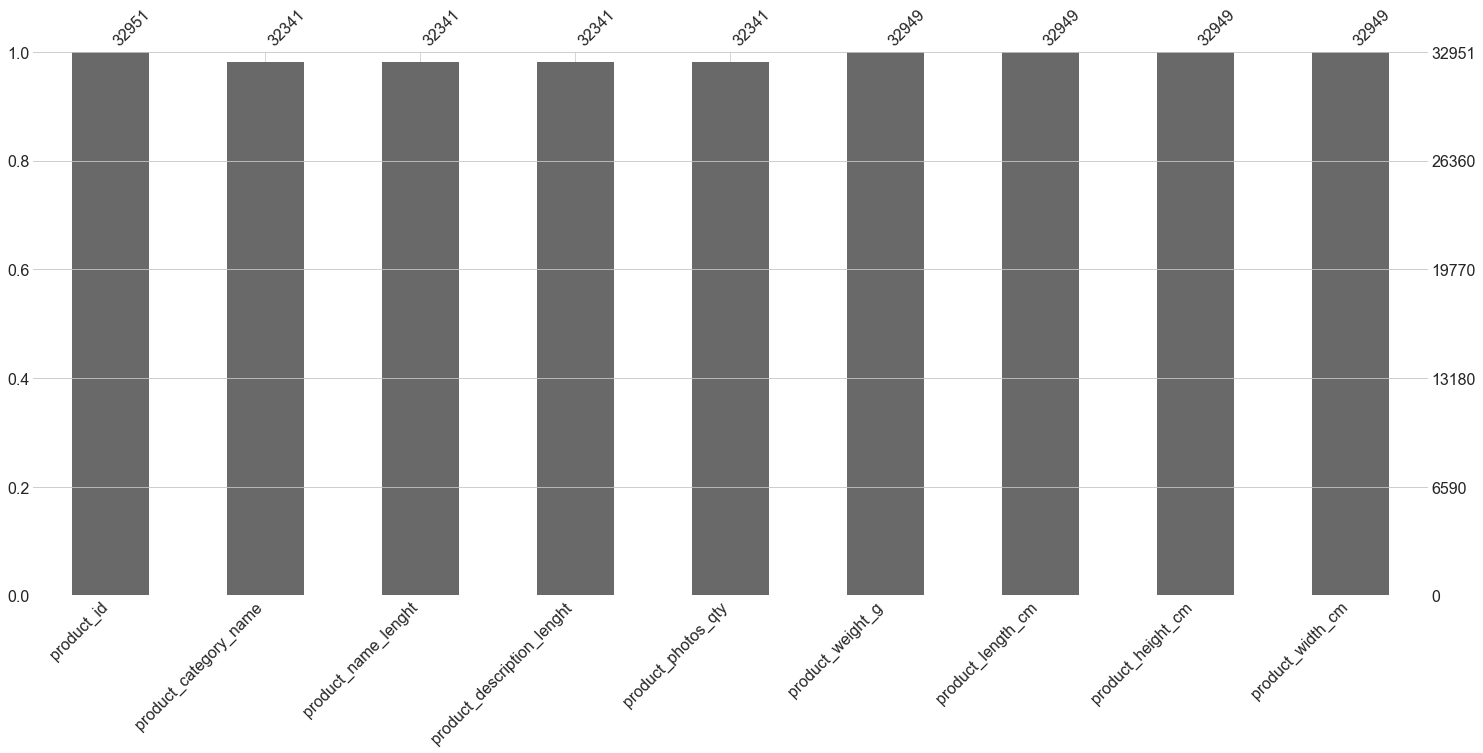

In [6]:
msno.bar(products) 

<AxesSubplot:>

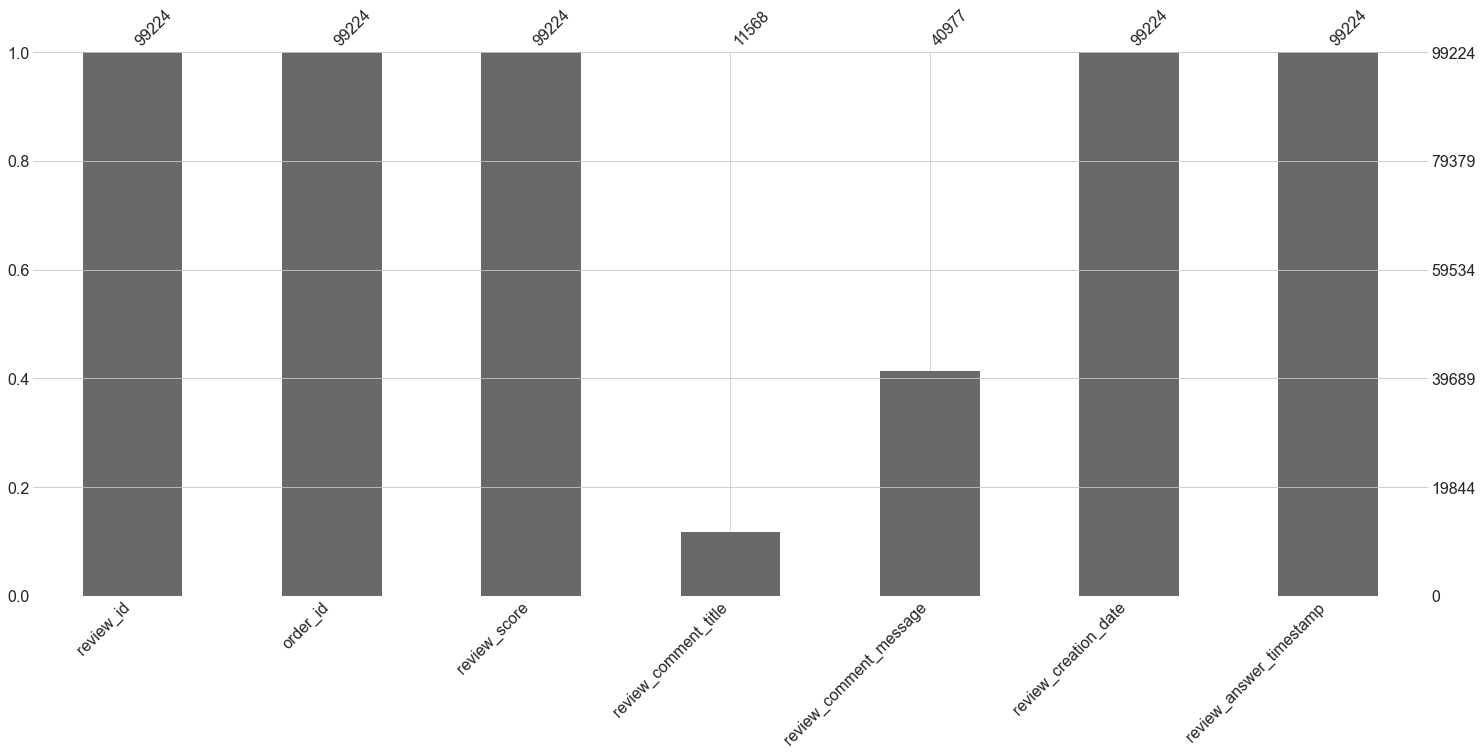

In [7]:
msno.bar(order_reviews) 

<AxesSubplot:>

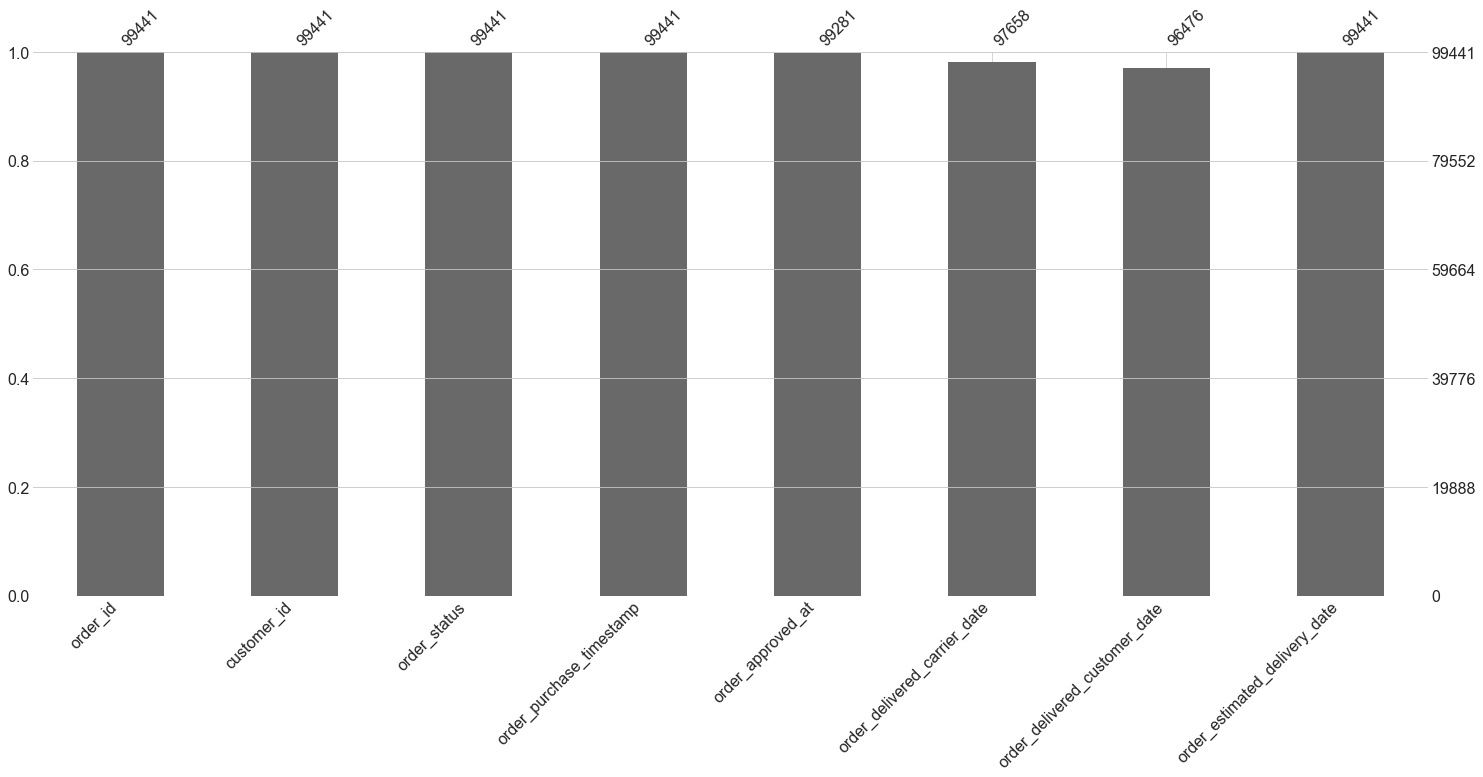

In [8]:
msno.bar(orders)

## Dataframe avec des doublons<a class="anchor" id="loc"></a>

In [9]:
geolocation[geolocation.duplicated()].shape

(261831, 5)

In [10]:
geolocation[geolocation.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


## Analyse univariée basique (par colonnes)<a class="anchor" id="df"></a>



###############################################
dataframe customers :
###############################################
observation variables cat :
customer_id           99441
customer_unique_id    96096
customer_city          4119
customer_state           27
dtype: int64 
 Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')
-----------
observation variables num :
description colonnes : 
         customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
variance : 
  customer_zip_code_prefix    8.879172e+08
dtype: float64
skewness : 
  customer_zip_code_prefix    0.779025
dtype: float64
kurtosis : 
  customer_zip_code_prefix   -0.788204
dtype: float64
boxplots variables num :


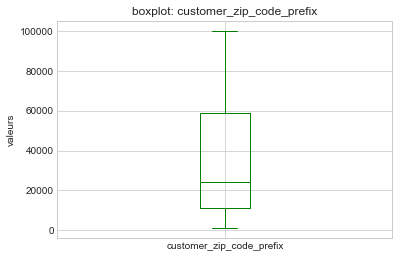

displots variables num :


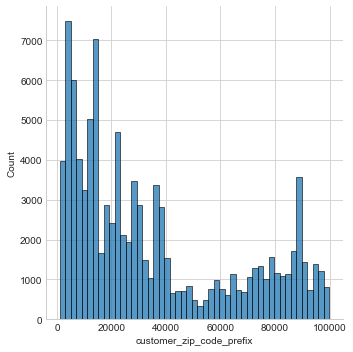



###############################################
dataframe geolocation :
###############################################
observation variables cat :
geolocation_city     8011
geolocation_state      27
dtype: int64 
 Index(['geolocation_city', 'geolocation_state'], dtype='object')
-----------
observation variables num :
description colonnes : 
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
variance : 
  geolocation_zip_c

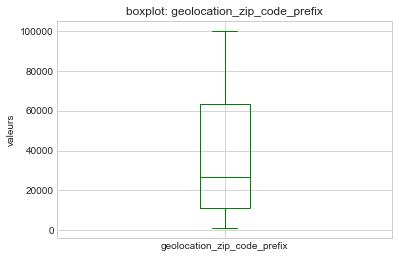

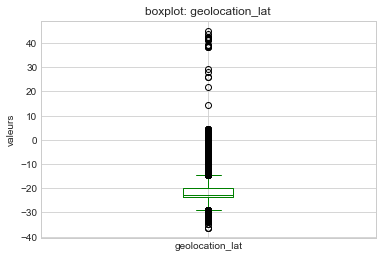

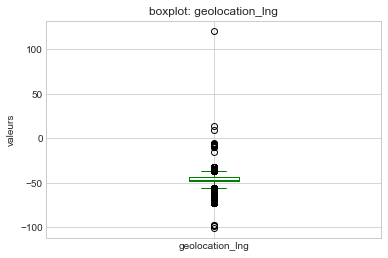

displots variables num :


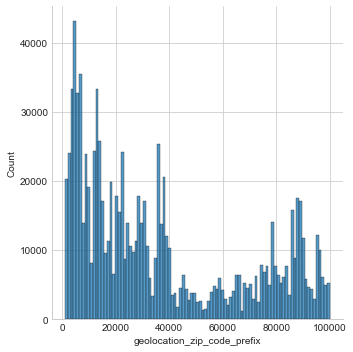

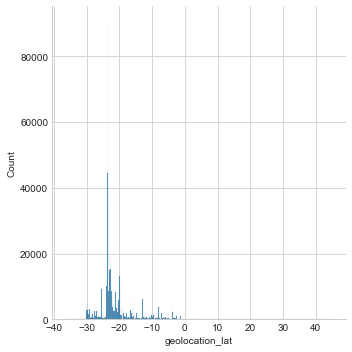

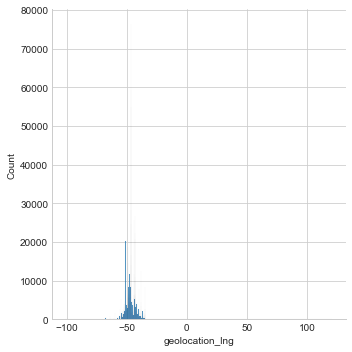



###############################################
dataframe orders :
###############################################
observation variables cat :
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64 
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
-----------
pas de var num


###############################################
dataframe order_items :
###############################################
observation variables cat :
order_id               98666
product_id             32951
seller_id               3095
shipping_limit_date    93318
d

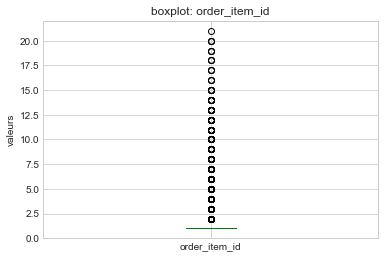

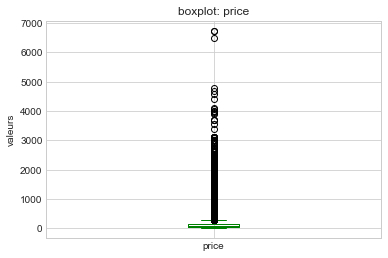

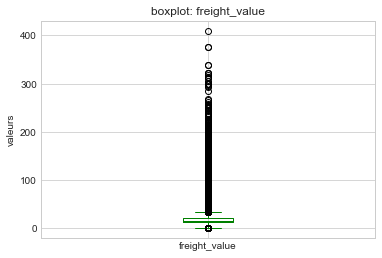

displots variables num :


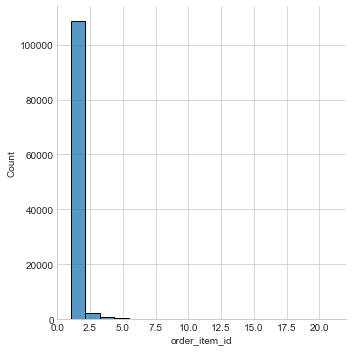

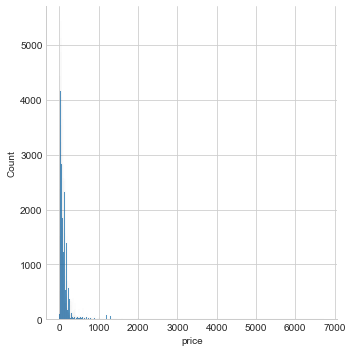

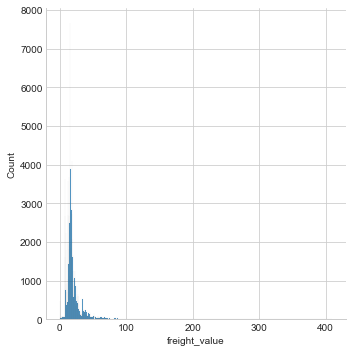



###############################################
dataframe order_payments :
###############################################
observation variables cat :
order_id        99440
payment_type        5
dtype: int64 
 Index(['order_id', 'payment_type'], dtype='object')
-----------
observation variables num :
description colonnes : 
         payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
variance : 
  payment_sequential          0.499261
payment_installments        7.220241
payment_value  

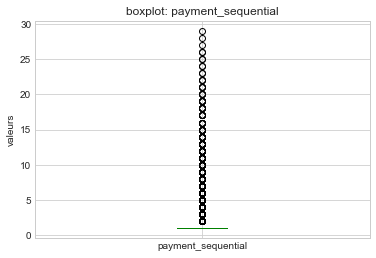

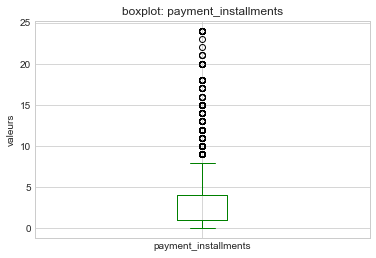

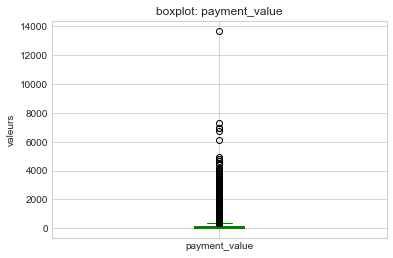

displots variables num :


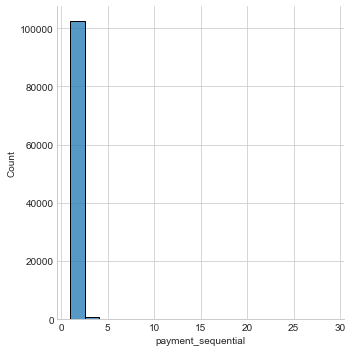

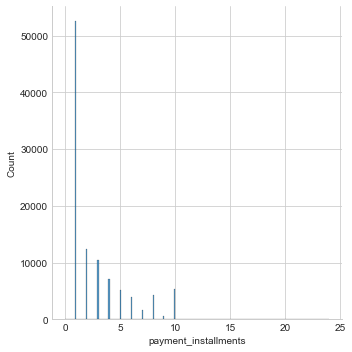

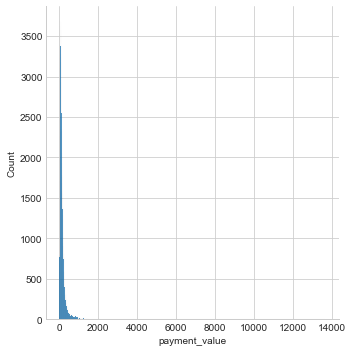



###############################################
dataframe order_reviews :
###############################################
observation variables cat :
review_id                  98410
order_id                   98673
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64 
 Index(['review_id', 'order_id', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
-----------
observation variables num :
description colonnes : 
         review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
variance : 
  review_score    1.81597
dtype: float64
skewness : 
  review_score   -1.364386
dtype: float64
kurtosis : 
  review_score    0.507653
dtype: float64
boxplots variables num :


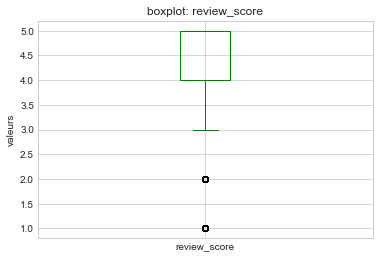

displots variables num :


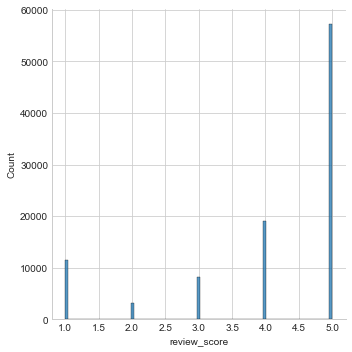



###############################################
dataframe products :
###############################################
observation variables cat :
product_id               32951
product_category_name       73
dtype: int64 
 Index(['product_id', 'product_category_name'], dtype='object')
-----------
observation variables num :
description colonnes : 
         product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000

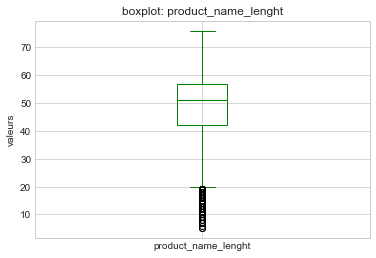

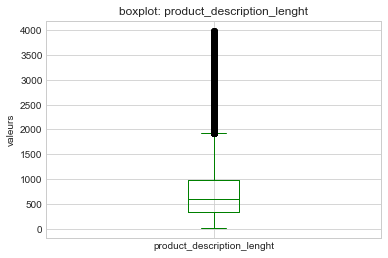

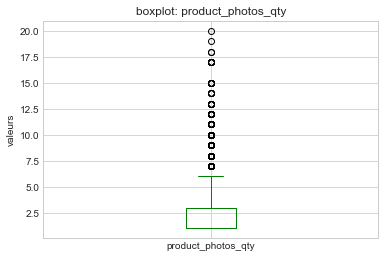

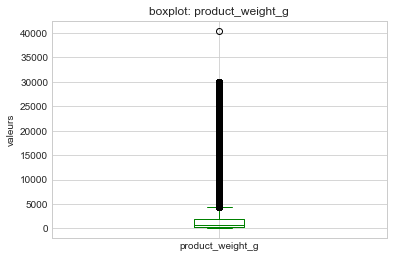

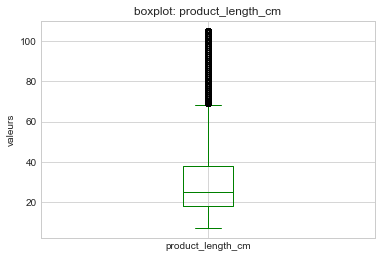

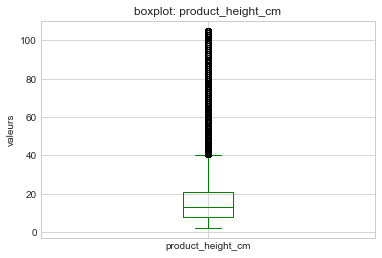

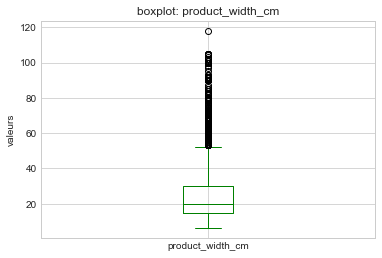

displots variables num :


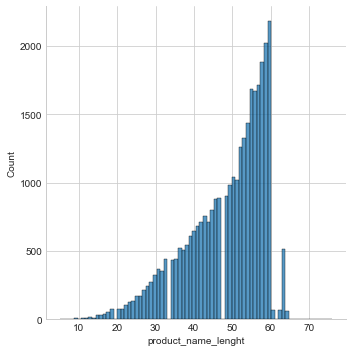

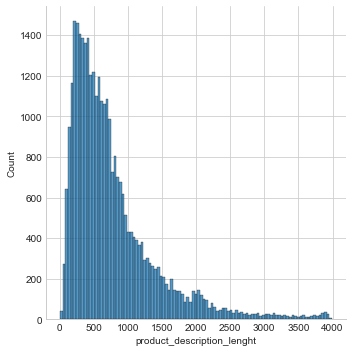

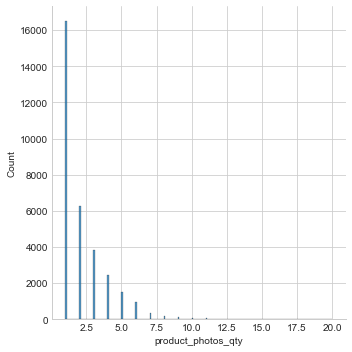

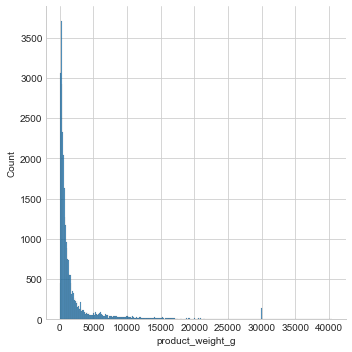

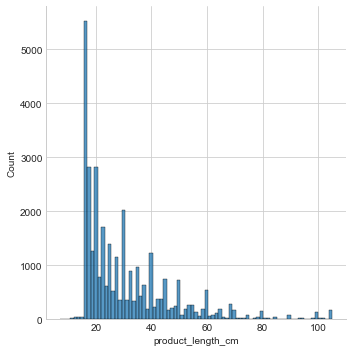

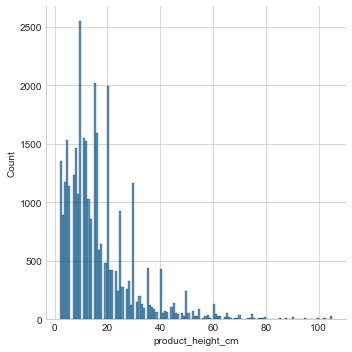

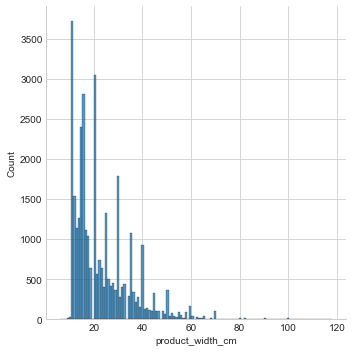



###############################################
dataframe sellers :
###############################################
observation variables cat :
seller_id       3095
seller_city      611
seller_state      23
dtype: int64 
 Index(['seller_id', 'seller_city', 'seller_state'], dtype='object')
-----------
observation variables num :
description colonnes : 
         seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000
variance : 
  seller_zip_code_prefix    1.070170e+09
dtype: float64
skewness : 
  seller_zip_code_prefix    0.916092
dtype: float64
kurtosis : 
  seller_zip_code_prefix   -0.858264
dtype: float64
boxplots variables num :


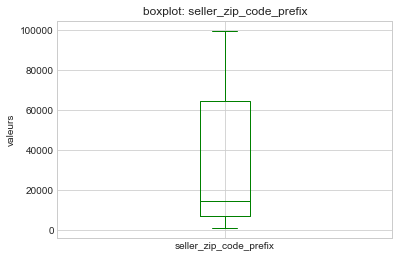

displots variables num :


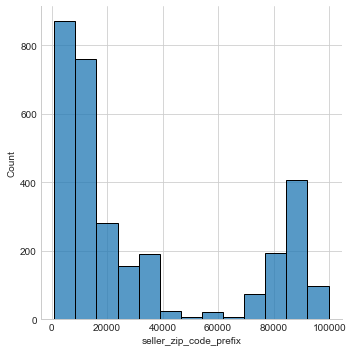



###############################################
dataframe translation :
###############################################
observation variables cat :
product_category_name            71
product_category_name_english    71
dtype: int64 
 Index(['product_category_name', 'product_category_name_english'], dtype='object')
-----------
pas de var num


In [11]:
for i,j in enumerate(datasets):
    print('\n')
    print("###############################################")
    print("dataframe {} :".format(datasets_name[i]))
    print("###############################################")
    
    #séparer var numéirques et catégoriques
    cat_data = j.select_dtypes(exclude=['int64','float64'])
    num_data = j.select_dtypes(include=['int64','float64'])
    
    #observation variables cat:
    print("observation variables cat :")
    print(cat_data.nunique(), '\n', cat_data.columns)
    print('-----------')
    
    if num_data.size > 0:
            #description et visualisation variables num:
        print("observation variables num :")
        print("description colonnes : \n ", num_data.describe())
        print("variance : \n ", num_data.var(axis = 0, skipna = True))
        print("skewness : \n ", num_data.skew(axis = 0, skipna = True))
        print("kurtosis : \n ", num_data.kurtosis(axis = 0, skipna = True))

        print("boxplots variables num :")
        for z in num_data.columns:
            num_data.boxplot(column = z, color = 'green')
            plt.title('boxplot: {}'.format(z))
            plt.ylabel('valeurs')
            plt.show()

        print("displots variables num :")
        for y in num_data.columns:
            sns.displot(num_data, x=y)
            plt.show()
            
    else:
        print("pas de var num")

## Analyse multi-variée basique par dataframe<a class="anchor" id="res"></a>



###############################################
dataframe customers :
###############################################
matrice des corrélations: 

                          customer_zip_code_prefix
customer_zip_code_prefix                       1.0


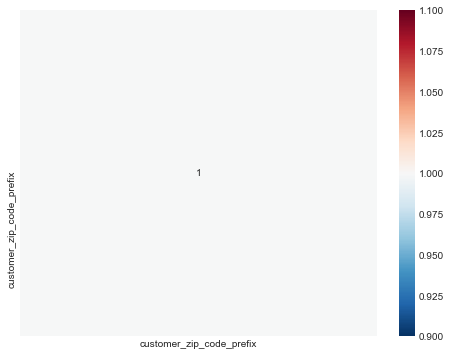

-----------
pairplots: 



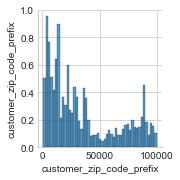



###############################################
dataframe geolocation :
###############################################
matrice des corrélations: 

                             geolocation_zip_code_prefix  geolocation_lat  \
geolocation_zip_code_prefix                     1.000000         0.094068   
geolocation_lat                                 0.094068         1.000000   
geolocation_lng                                -0.347488         0.398946   

                             geolocation_lng  
geolocation_zip_code_prefix        -0.347488  
geolocation_lat                     0.398946  
geolocation_lng                     1.000000  


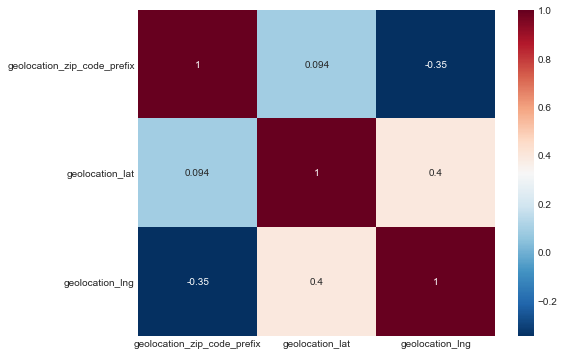

-----------
pairplots: 



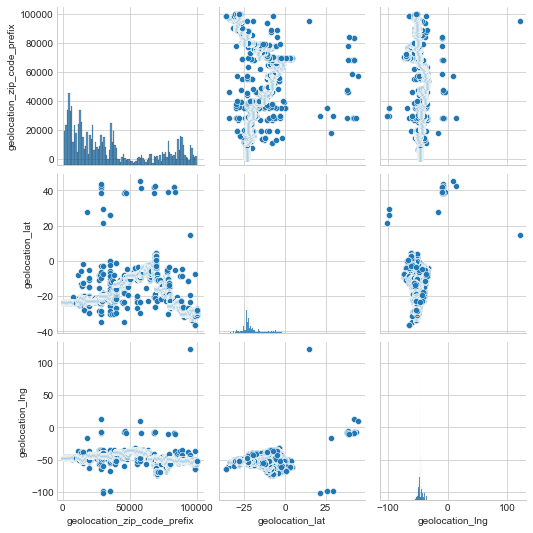



###############################################
dataframe orders :
###############################################
matrice des corrélations: 

Empty DataFrame
Columns: []
Index: []
Not defined


###############################################
dataframe order_items :
###############################################
matrice des corrélations: 

               order_item_id     price  freight_value
order_item_id       1.000000 -0.060522      -0.029380
price              -0.060522  1.000000       0.414204
freight_value      -0.029380  0.414204       1.000000


<Figure size 576x432 with 0 Axes>

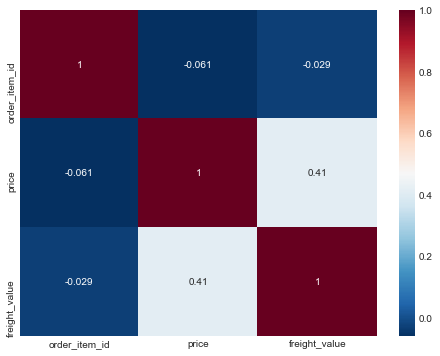

-----------
pairplots: 



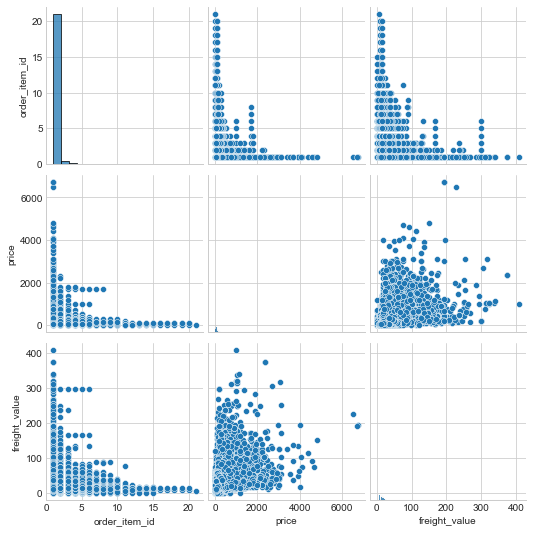



###############################################
dataframe order_payments :
###############################################
matrice des corrélations: 

                      payment_sequential  payment_installments  payment_value
payment_sequential              1.000000             -0.086363      -0.069593
payment_installments           -0.086363              1.000000       0.330811
payment_value                  -0.069593              0.330811       1.000000


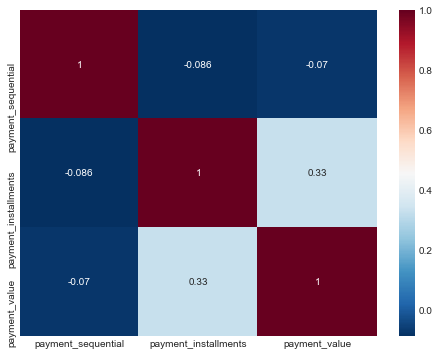

-----------
pairplots: 



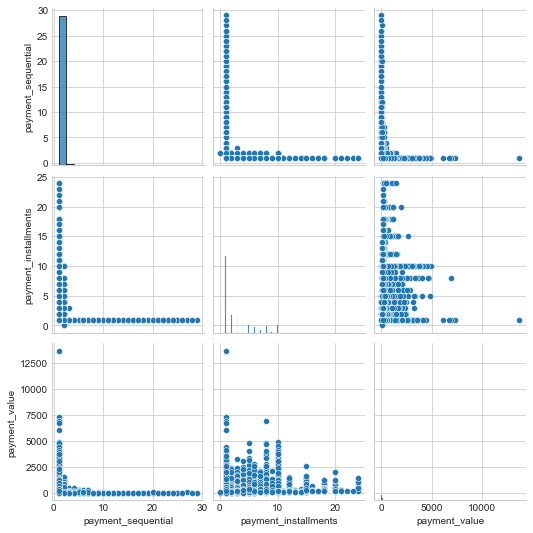



###############################################
dataframe order_reviews :
###############################################
matrice des corrélations: 

              review_score
review_score           1.0


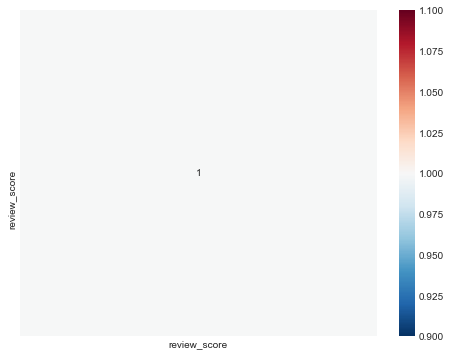

-----------
pairplots: 



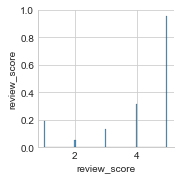



###############################################
dataframe products :
###############################################
matrice des corrélations: 

                            product_name_lenght  product_description_lenght  \
product_name_lenght                    1.000000                    0.098741   
product_description_lenght             0.098741                    1.000000   
product_photos_qty                     0.134321                    0.108745   
product_weight_g                       0.044664                    0.062445   
product_length_cm                      0.080556                    0.034849   
product_height_cm                     -0.016494                    0.063519   
product_width_cm                       0.070741                   -0.030869   

                            product_photos_qty  product_weight_g  \
product_name_lenght                   0.134321          0.044664   
product_description_lenght            0.108745          0.062445   
product_photos_q

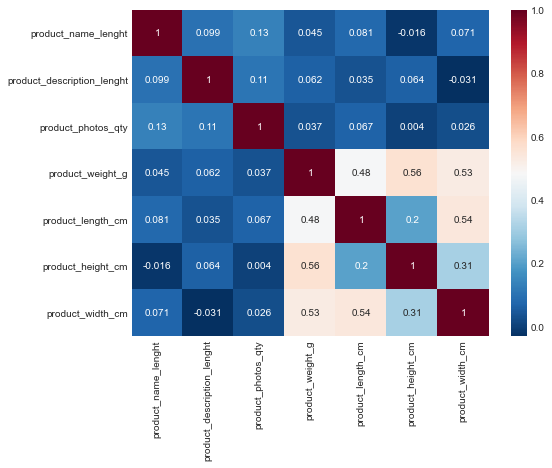

-----------
pairplots: 



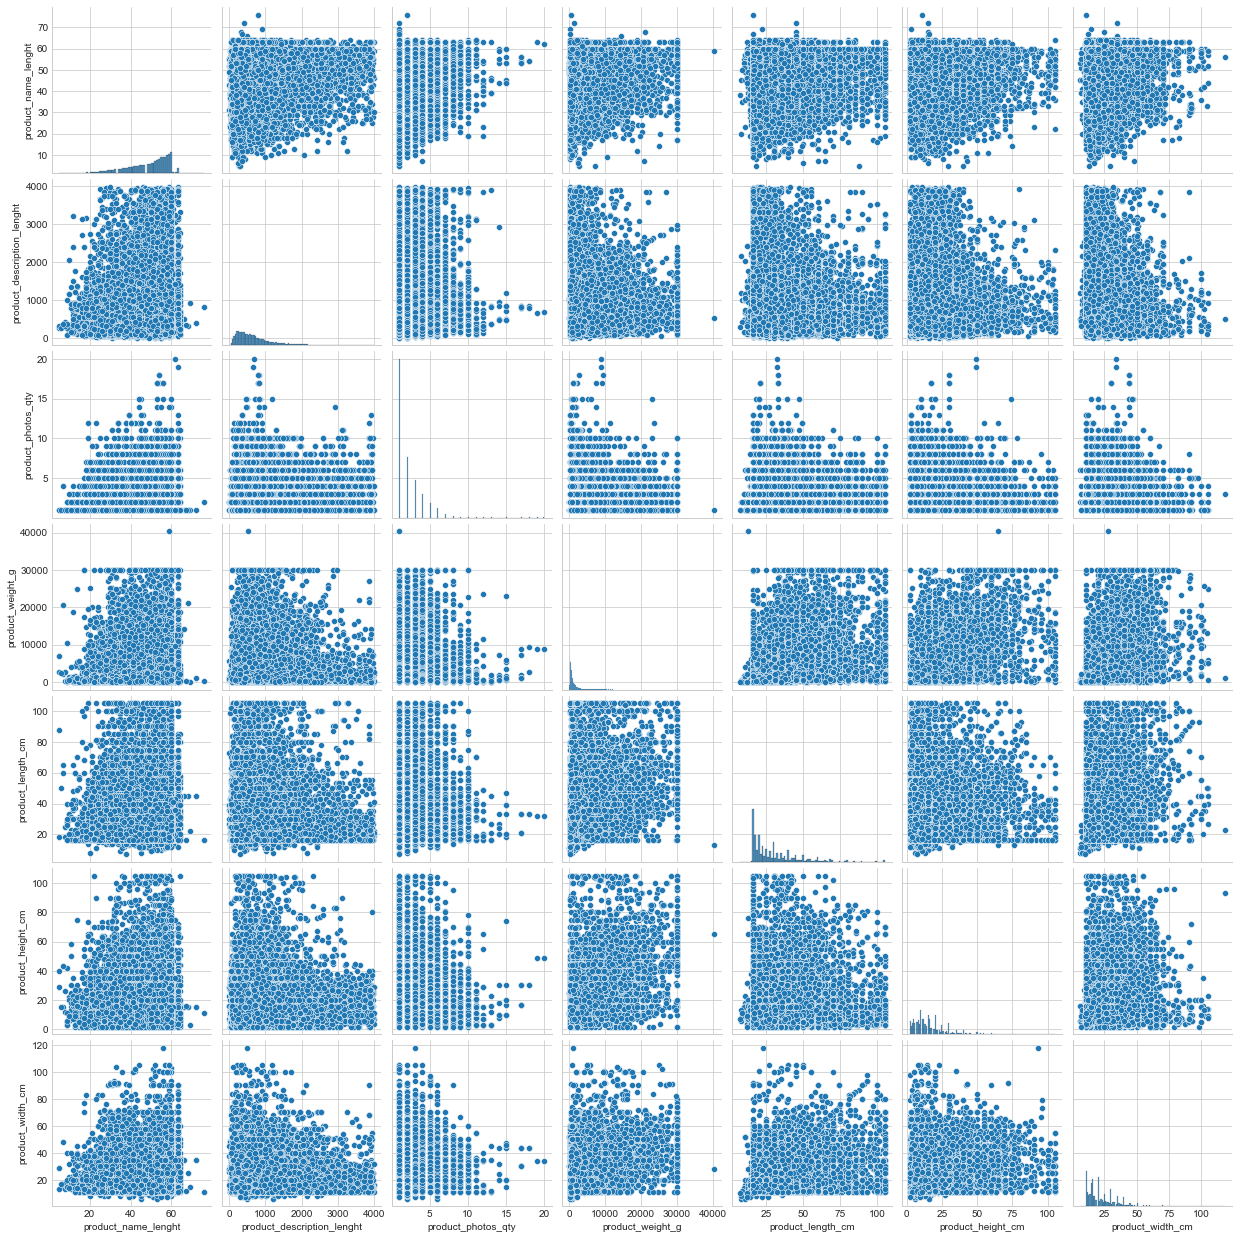



###############################################
dataframe sellers :
###############################################
matrice des corrélations: 

                        seller_zip_code_prefix
seller_zip_code_prefix                     1.0


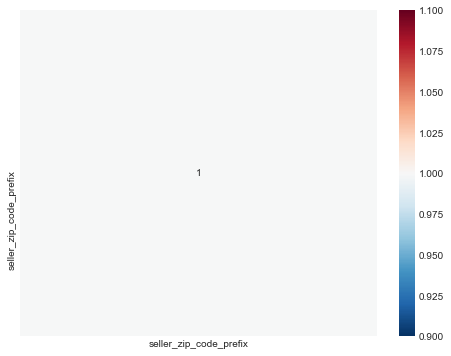

-----------
pairplots: 



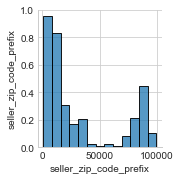



###############################################
dataframe translation :
###############################################
matrice des corrélations: 

Empty DataFrame
Columns: []
Index: []
Not defined


<Figure size 576x432 with 0 Axes>

In [12]:
for i,j in enumerate(datasets):
    print('\n')
    print("###############################################")
    print("dataframe {} :".format(datasets_name[i]))
    print("###############################################")
    
    try:
        print("matrice des corrélations: \n")
        corr_df = j.corr(method='pearson')
        print(corr_df)
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_df, cmap = 'RdBu_r', annot=True)
        plt.show()
        print('-----------')

        print("pairplots: \n")
        sns.pairplot(j)
        plt.show()
    
    except Exception:
        print('Not defined')
    
    

## 2. Premier nettoyage et Merge <a class="anchor" id="p1"></a>

## remplissage des données manquantes <a class="anchor" id="var"></a>

In [13]:
mis_cols = ['product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']

products['product_category_name'].fillna('None',inplace=True)

for i in mis_cols:
    products[i].fillna(0, inplace=True)

In [14]:
mis_cols = ['review_comment_title', 'review_comment_message']

for i in mis_cols:
    order_reviews[i].fillna('None', inplace=True)

In [15]:
mis_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

for i in mis_cols:
    orders[i].fillna('NaT', inplace=True)

## traitement des doublons<a class="anchor" id="corr"></a>

In [16]:
geolocation.drop_duplicates(inplace=True)

In [17]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [18]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
#changer de nom pour le merge des dataframes
geolocation['customer_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix']

## gestion des données temporelles <a class="anchor" id="bof"></a>

In [20]:
#passer les données temporelles en datetime pour faciliter le traitement:
time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']

for i in time:
    orders[i] = orders[i].astype('datetime64')

In [21]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].astype('datetime64')

In [22]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [23]:
order_reviews['review_creation_date'] = order_reviews['review_creation_date'].astype('datetime64')

## Merge et vérifications/nettoyages (données géolocalisation) <a class="anchor" id="drop"></a>

In [24]:
#observer le nom des colonnes pour voir les clefs des dataframes:
for i,j in enumerate(datasets):
    print('\n')
    print("###############################################")
    print("dataframe {} :".format(datasets_name[i]))
    print("###############################################")
    print(j.columns)



###############################################
dataframe customers :
###############################################
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


###############################################
dataframe geolocation :
###############################################
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'customer_zip_code_prefix'],
      dtype='object')


###############################################
dataframe orders :
###############################################
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


###############################################
dataframe order_items :
#####################

In [25]:
#on construit d'abord un dataframe qui contient toutes les commandes ('orders') disponibles dans nos données:
data = orders.merge(order_items, on='order_id', how='left')

In [26]:
data = data.merge(order_payments,on='order_id',how='left')

In [27]:
data = data.merge(order_reviews,on='order_id',how='left')

In [28]:
data = data.merge(customers,on='customer_id',how='left')

In [29]:
data = data.merge(products,on='product_id',how='left')

In [30]:
data = data.merge(sellers,on='seller_id',how='left')

In [31]:
#on traduit la colonne product_category_name:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [32]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [33]:
Portuguese = list(translation['product_category_name'])
English = list(translation['product_category_name_english'])

data['product_category_name'].replace(Portuguese,English,inplace=True)

In [34]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [35]:
#On note dans geolocation.head() que même zipcodes pour lat et long differentes (anonymisation?)
mean_geol = geolocation.groupby(['customer_zip_code_prefix'],as_index=False).agg({'geolocation_lat':'mean', 
                                                                                  'geolocation_lng':'mean'})

In [36]:
mean_geol

,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343920,-51.874988
19013,99980,-28.389500,-51.843122


In [37]:
data = data.merge(mean_geol,on='customer_zip_code_prefix',how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

In [38]:
#description(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

<AxesSubplot:>

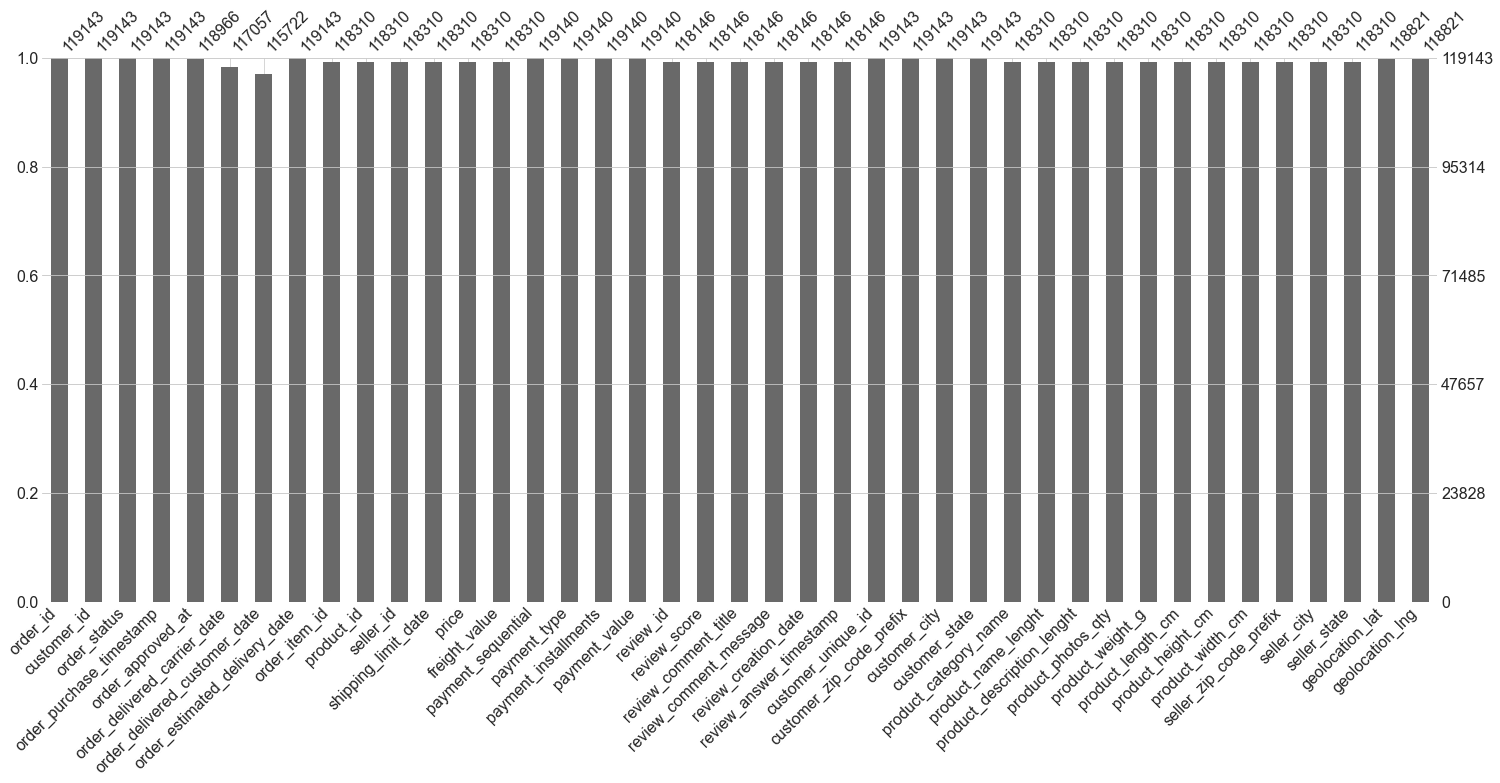

In [39]:
msno.bar(data)

In [40]:
data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
review_comment_title              997
review_comment_message            997
review_creation_date              997
review_answer_timestamp           997
customer_unique_id                  0
customer_zip_code_prefix            0
customer_cit

In [41]:
mis_col = data[data.isna().any(axis=1)]
mis_col.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,1.0,credit_card,1.0,65.95,e07549ef5311abcc92ba1784b093fb56,2.0,None,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13 20:25:42,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,None,0.0,0.0,0.0,600.0,35.0,35.0,15.0,5455.0,sao paulo,SP,-27.866213,-54.470411
20,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,1.0,credit_card,10.0,1376.45,NaN,NaN,NaN,NaN,NaT,NaN,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,construction_tools_construction,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,8840.0,mogi das cruzes,SP,-22.879051,-43.314227
51,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1.0,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,1.0,boleto,1.0,22.36,5853e27c64b89e222c5e4edf78bec3d4,1.0,None,None,2018-07-01,2018-07-11 20:41:18,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,health_beauty,59.0,1782.0,1.0,125.0,25.0,14.0,18.0,11701.0,praia grande,SP,-23.169423,-46.886770
125,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,1.0,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35.00,15.35,1.0,boleto,1.0,50.35,c4b17a374b71539eb360fe5baaa9a10e,3.0,bolo fake,"Gostei do produto, porem fiquei preocupada não...",2018-08-25,2018-08-29 10:48:52,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,christmas_supplies,35.0,415.0,4.0,550.0,37.0,10.0,37.0,3644.0,sao paulo,SP,-27.688477,-48.773253
155,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,1.0,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.90,12.38,1.0,credit_card,2.0,138.28,8079a046b23b88c4cea485cfbd8aec39,5.0,None,None,2017-10-05,2017-10-05 12:55:11,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,perfumery,59.0,149.0,1.0,500.0,36.0,18.0,27.0,19023.0,presidente prudente,SP,-23.559560,-46.531456


In [42]:
mis_col['order_status'].nunique

<bound method IndexOpsMixin.nunique of 8            invoiced
20          delivered
51            shipped
125          invoiced
155        processing
             ...     
118946       canceled
118995     processing
119039       canceled
119040    unavailable
119112    unavailable
Name: order_status, Length: 4603, dtype: object>

In [43]:
mis_col['order_status'].value_counts()

shipped        1256
delivered      1190
canceled        743
unavailable     652
invoiced        378
processing      376
created           5
approved          3
Name: order_status, dtype: int64

In [44]:
#peut_on se permettre de droper les lignes avec valeurs manquantes?
print(data.shape)
mis_col.shape

(119143, 41)


(4603, 41)

In [45]:
data.dropna(inplace = True)

## 3. "Feature engineering" et nettoyage<a class="anchor" id="p2"></a>

In [46]:
time_data = data.select_dtypes(include='datetime64[ns]')

In [47]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114540 entries, 0 to 119142
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       114540 non-null  datetime64[ns]
 1   order_approved_at              114540 non-null  datetime64[ns]
 2   order_delivered_carrier_date   114540 non-null  datetime64[ns]
 3   order_delivered_customer_date  114540 non-null  datetime64[ns]
 4   order_estimated_delivery_date  114540 non-null  datetime64[ns]
 5   shipping_limit_date            114540 non-null  datetime64[ns]
 6   review_creation_date           114540 non-null  datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 7.0 MB


## Création de nouvelles variables temporelles<a class="anchor" id="temp"></a>

In [48]:
time_delivery_customer = []
for i in time_data.index:
    time_delivery_customer.append(((time_data['order_delivered_customer_date'][i] - time_data['order_purchase_timestamp'][i]).total_seconds())/3600)
    
time_data['time_delivery_customer'] = time_delivery_customer

<ipython-input-48-bd666f9a4b1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['time_delivery_customer'] = time_delivery_customer


In [49]:
company_processing_time = []
for i in time_data.index:
    company_processing_time.append(((time_data['order_delivered_carrier_date'][i] - time_data['order_approved_at'][i]).total_seconds())/3600)
    
time_data['company_processing_time'] = company_processing_time

<ipython-input-49-683014a7067b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['company_processing_time'] = company_processing_time


In [50]:
estimation_error_time = []
for i in time_data.index:
    estimation_error_time.append(((time_data['order_estimated_delivery_date'][i] - time_data['order_delivered_customer_date'][i]).total_seconds())/3600)
    
time_data['estimation_error_time'] = estimation_error_time

<ipython-input-50-7f0d78e21df4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['estimation_error_time'] = estimation_error_time


In [51]:
purchase_approval_time = []
for i in time_data.index:
    purchase_approval_time.append(((time_data['order_approved_at'][i] - time_data['order_purchase_timestamp'][i]).total_seconds())/3600)
    
time_data['purchase_approval_time'] = purchase_approval_time

<ipython-input-51-bec9d423af7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['purchase_approval_time'] = purchase_approval_time


In [52]:
time_data.columns
to_merge = time_data[['time_delivery_customer',
       'company_processing_time', 'estimation_error_time',
       'purchase_approval_time']]

<AxesSubplot:>

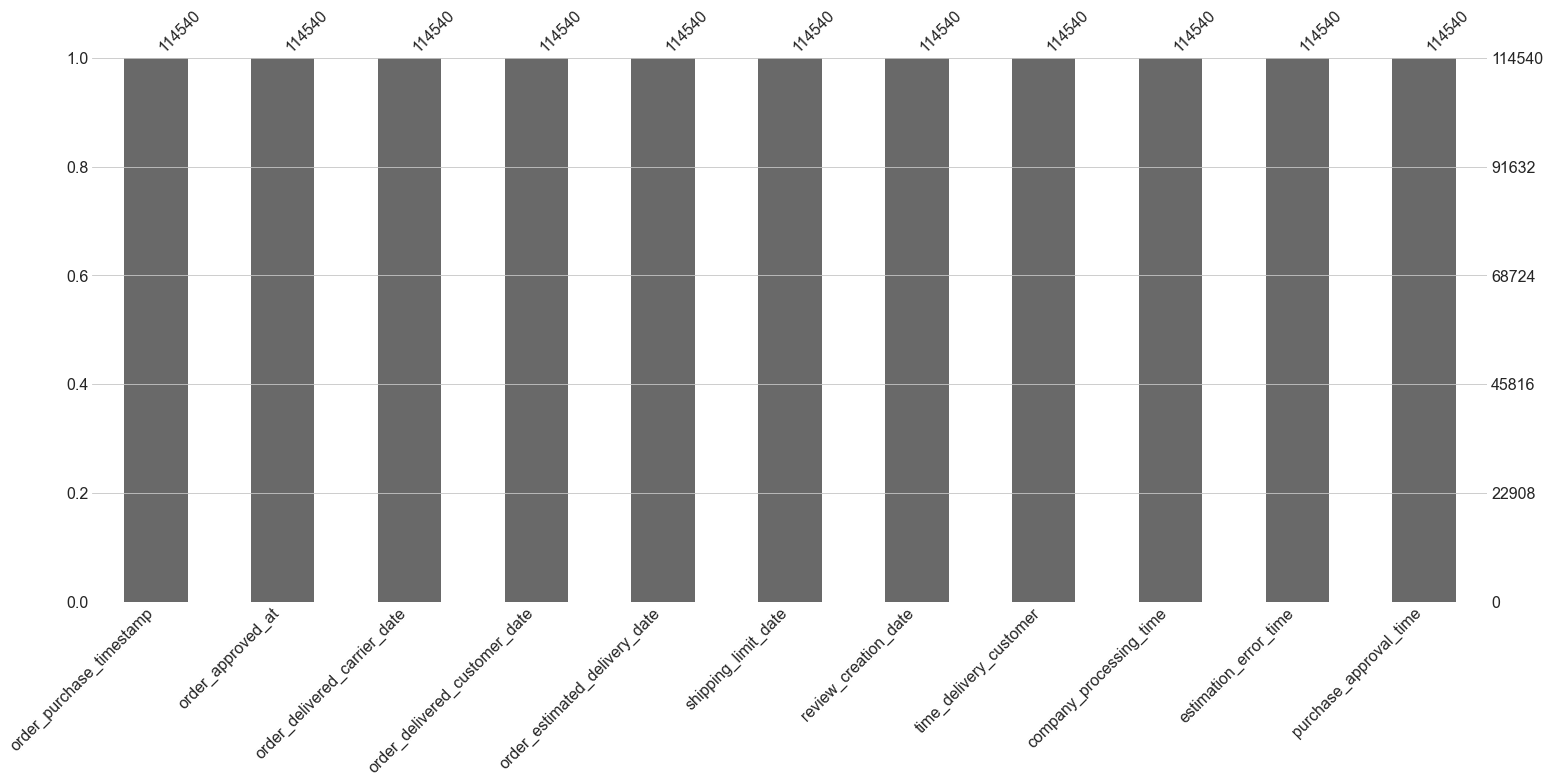

In [53]:
msno.bar(time_data)

In [54]:
#on travail sur une copie de notre dataframe en cas d'erreurs: remplacer les dates par nos nouvelles variables plus de sens:
r_data = data.copy()
r_data.drop(['order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date',
       'review_creation_date'], axis = 1, inplace = True)

r_data = pd.concat([r_data, to_merge], axis = 1)

<AxesSubplot:>

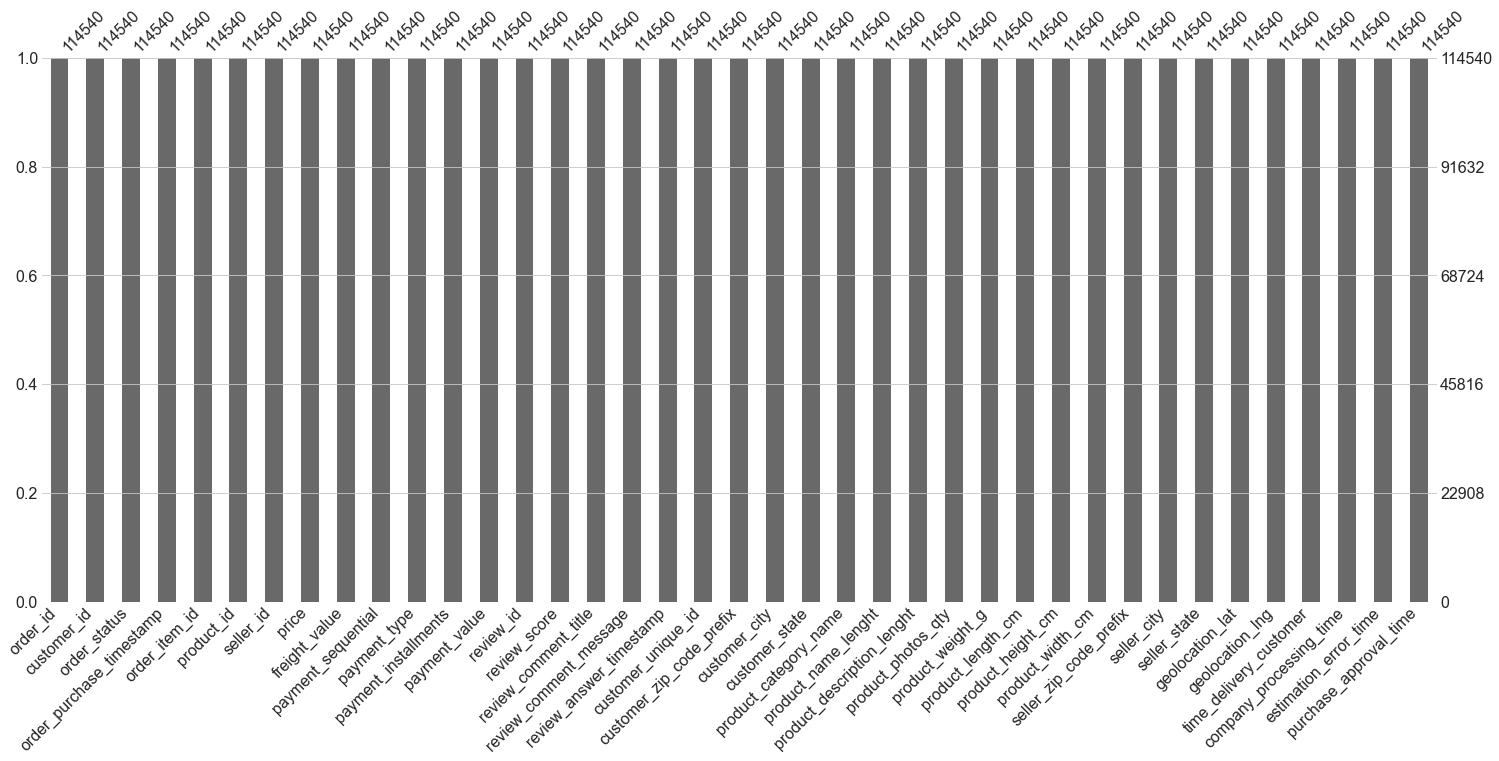

In [55]:
msno.bar(r_data)

## Verifications des possibles corrélations entre features<a class="anchor" id="corr2"></a>

matrice des corrélations: 



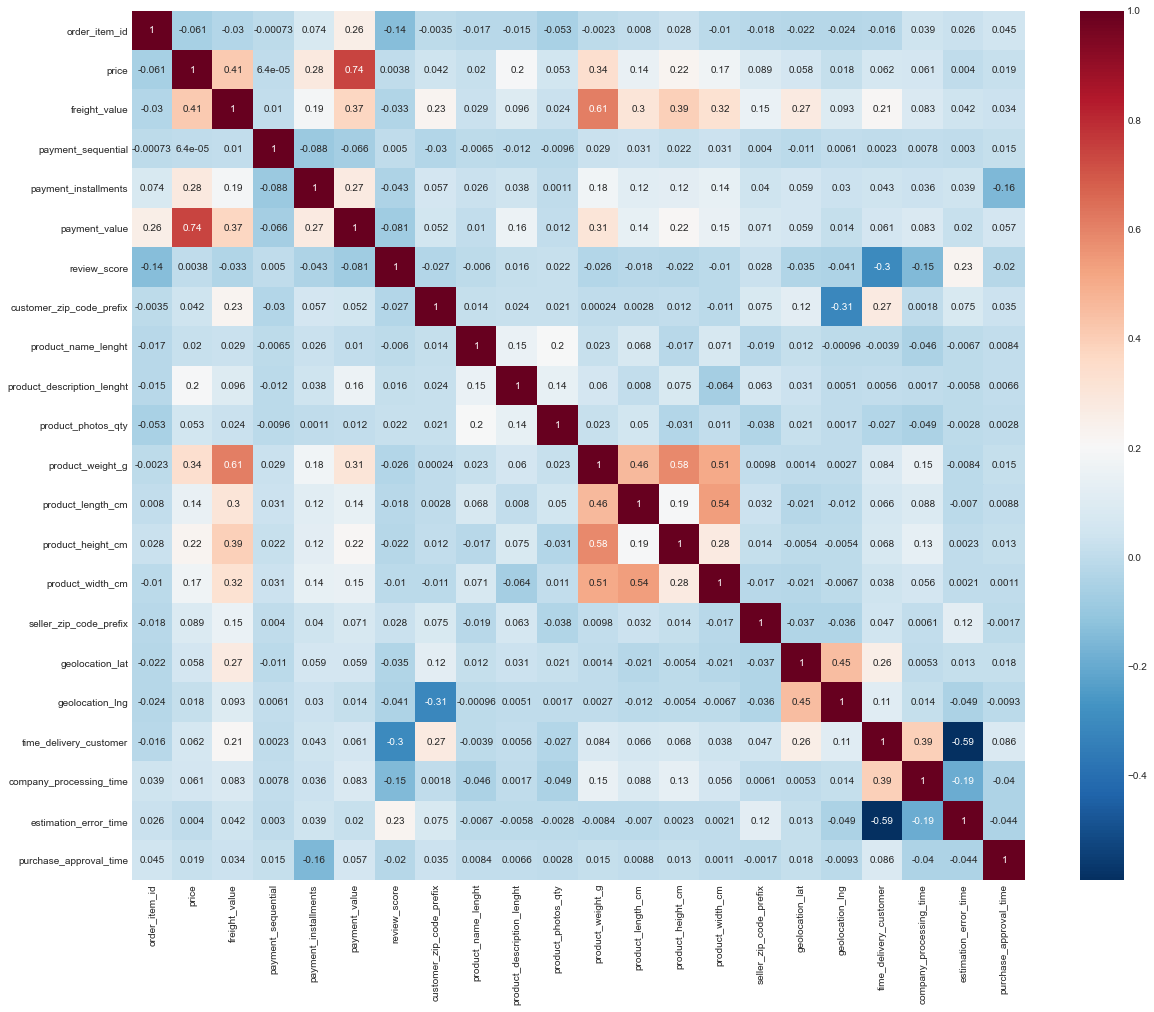

In [56]:
#observer s'il y a des corrélations importantes entre nos variables:
print("matrice des corrélations: \n")
corr_df = r_data.corr(method='pearson')
plt.figure(figsize=(20, 16))
sns.heatmap(corr_df, cmap = 'RdBu_r', annot=True)
plt.show()

In [57]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114540 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    114540 non-null  object        
 1   customer_id                 114540 non-null  object        
 2   order_status                114540 non-null  object        
 3   order_purchase_timestamp    114540 non-null  datetime64[ns]
 4   order_item_id               114540 non-null  float64       
 5   product_id                  114540 non-null  object        
 6   seller_id                   114540 non-null  object        
 7   price                       114540 non-null  float64       
 8   freight_value               114540 non-null  float64       
 9   payment_sequential          114540 non-null  float64       
 10  payment_type                114540 non-null  object        
 11  payment_installments        114540 non-

## suite du nettoyage, drop et verifications<a class="anchor" id="nett"></a>

In [58]:
#pour les reviews: on ne conserve que le score (pas de nlp ou sentiment analysis)
r_data.drop(['review_comment_title',
       'review_comment_message', 'review_answer_timestamp'], axis = 1, inplace = True)

In [59]:
#pour customer: on possede les informations de geolocalisation (longitude/latitude): pas besoin de city, state, zipcode prefix?
r_data.drop(['customer_zip_code_prefix', 'customer_city',
       'customer_state'], axis = 1, inplace = True)


In [60]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114540 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    114540 non-null  object        
 1   customer_id                 114540 non-null  object        
 2   order_status                114540 non-null  object        
 3   order_purchase_timestamp    114540 non-null  datetime64[ns]
 4   order_item_id               114540 non-null  float64       
 5   product_id                  114540 non-null  object        
 6   seller_id                   114540 non-null  object        
 7   price                       114540 non-null  float64       
 8   freight_value               114540 non-null  float64       
 9   payment_sequential          114540 non-null  float64       
 10  payment_type                114540 non-null  object        
 11  payment_installments        114540 non-

In [61]:
#On peut séparer order_purchase_timestamp en mois, jours, années pour une analyse de série temporelle:
r_data['order_purchase_timestamp']

0        2017-10-02 10:56:33
1        2017-10-02 10:56:33
2        2017-10-02 10:56:33
3        2018-07-24 20:41:37
4        2018-08-08 08:38:49
                 ...        
119138   2018-02-06 12:58:58
119139   2017-08-27 14:46:43
119140   2018-01-08 21:28:27
119141   2018-01-08 21:28:27
119142   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 114540, dtype: datetime64[ns]

In [62]:
r_data['order_purchase_year'] = r_data.order_purchase_timestamp.apply(lambda x: x.year)
r_data['order_purchase_month'] = r_data.order_purchase_timestamp.apply(lambda x: x.month)
r_data['order_purchase_dayofweek'] = r_data.order_purchase_timestamp.apply(lambda x: x.dayofweek)
r_data['order_purchase_hour'] = r_data.order_purchase_timestamp.apply(lambda x: x.hour)
r_data['order_purchase_day'] = r_data['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',
                                                                       6:'Sun'})
r_data['order_purchase_mon'] = r_data.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',
                                                                                             4:'Apr',5:'May',6:'Jun',
                                                                                             7:'Jul',8:'Aug',9:'Sep',
                                                                                             10:'Oct',11:'Nov',12:'Dec'})


In [63]:
r_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,af07308b275d755c9edb36a90c618231,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-12.186877,-44.540232,330.768889,11.109167,128.537500,30.713889,2018,7,1,20,Tue,Jul
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,3a653a41f6f9fc3d2a113cf8398680e8,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-16.745150,-48.514783,225.461111,4.910278,413.891944,0.276111,2018,8,2,8,Wed,Aug


In [64]:
#colonne mois_année ordonnée:
r_data['month_year'] = r_data['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [65]:
r_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,af07308b275d755c9edb36a90c618231,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-12.186877,-44.540232,330.768889,11.109167,128.537500,30.713889,2018,7,1,20,Tue,Jul,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,3a653a41f6f9fc3d2a113cf8398680e8,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-16.745150,-48.514783,225.461111,4.910278,413.891944,0.276111,2018,8,2,8,Wed,Aug,201808


## Gestion des cas atypiques<a class="anchor" id="atyp"></a>

#### Comportement etrange: 3 achats identiques par la même personne, même objet, même date, payements différents.

In [66]:
r_data[r_data['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710


In [67]:
order_payments[order_payments['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
10770,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12
44246,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00
91130,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59


In [68]:
orders[orders['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18


#### Explication: probablement une offre promotionelle -> usage de bons d'achats (vouchers) pour ce produit spécifiquement ce qui expliquerait qu'il y ait un ordre des paiements et des méthodes différentes pour une seule commande et un seul et même produit. // cf différence entre payment_value ("Reste à payer") et prix des produits.

#### -> solution: feature engineering pour garder de l'information sur les modalités de paiement mais avoir une ligne unique par commande.

#### Quelle info utile? l'ordre des paiements moins interessant que si payement en plusieurs fois. drop: payment_sequential, garder le max de paiement_installments. payment_value interessant: garder la somme. payment_type interessant: creer des dummy de chaque moyen de paiements, puis groupby max (0 ou 1) pour chaque dummy (si credit card utilisé, si voucher utilisé, etc...)


In [69]:
payment_types = pd.get_dummies(r_data['payment_type'])
r_data.drop(['payment_type', 'payment_sequential'], axis = 1, inplace = True)
r_data = pd.concat([r_data, payment_types], axis = 1)

In [70]:
# passage à un dataframe propre et unique par commande:
def my_agg(x):
    names = {
        'payment_installments': x['payment_installments'].max(),
        'boleto': x['boleto'].max(),
        'credit_card': x['credit_card'].max(),
        'debit_card': x['debit_card'].max(),
        'voucher': x['voucher'].max(),
        'payment_value': x['payment_value'].sum()}

    return pd.Series(names, index=['payment_installments', 'boleto', 'credit_card', 'debit_card', 'voucher', 'payment_value'])

orders_groupby = r_data.groupby('order_id').apply(my_agg)

In [71]:
orders_groupby['order_id'] = orders_groupby.index
orders_groupby[orders_groupby['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,payment_installments,boleto,credit_card,debit_card,voucher,payment_value,order_id
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,1.0,0.0,1.0,0.0,1.0,38.71,e481f51cbdc54678b7cc49136f2d6af7


In [72]:
r_data.drop(['payment_installments', 'boleto', 'credit_card', 'debit_card', 'voucher', 'payment_value'], axis = 1, inplace = True)
r_data[r_data.duplicated(keep = False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710
11,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,149.99,19.77,abc5655186d40772bd6e410420e6a3ed,5.0,299905e3934e9e181bfb2e164dd4b4f8,office_furniture,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,8577.0,itaquaquecetuba,SP,-23.474639,-47.467220,437.324444,295.664444,150.758333,0.175000,2017,7,5,11,Sat,Jul,201707
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,149.99,19.77,abc5655186d40772bd6e410420e6a3ed,5.0,299905e3934e9e181bfb2e164dd4b4f8,office_furniture,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,8577.0,itaquaquecetuba,SP,-23.474639,-47.467220,437.324444,295.664444,150.758333,0.175000,2017,7,5,11,Sat,Jul,201707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119131,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,1.0,c982dbea53b864f4d27c1d36f14b6053,1caf283236cd69af44cbc09a0a1e7d32,42.11,0.80,ebd75732b5804e934123d11ec1f11db0,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,19.0,328.0,3.0,600.0,48.0,10.0,48.0,26020.0,nova iguacu,RJ,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119132,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2.0,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,26.90,36.98,ebd75732b5804e934123d11ec1f11db0,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,40.0,180.0,3.0,750.0,26.0,15.0,26.0,26020.0,nova iguacu,RJ,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119133,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2.0,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,26.90,36.98,ebd75732b5804e934123d11ec1f11db0,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,40.0,180.0,3.0,750.0,26.0,15.0,26.0,26020.0,nova iguacu,RJ,-15.572513,-56.084154,384.468889,20.760556,

In [73]:
r_data.drop_duplicates(inplace = True)

In [74]:
r_data[r_data.duplicated(['order_id', 'customer_unique_id'],keep = False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,1.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.00,30.53,15898b543726a832d4137fbef5d1d00e,1.0,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,29156.0,cariacica,ES,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.00,30.53,15898b543726a832d4137fbef5d1d00e,1.0,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,29156.0,cariacica,ES,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,1.0,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,90.90,48.64,2d4303fd561eb4ab51c87faa6598dc10,1.0,576ea0cab426cd8a00fad9a9c90a4494,baby,53.0,233.0,1.0,10950.0,41.0,40.0,40.0,14910.0,tabatinga,SP,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
33,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2.0,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,39.50,48.64,2d4303fd561eb4ab51c87faa6598dc10,1.0,576ea0cab426cd8a00fad9a9c90a4494,baby,52.0,300.0,1.0,350.0,31.0,10.0,12.0,14940.0,ibitinga,SP,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
59,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,1.0,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,60.00,15.52,25b502beeef8b3aff87449ccdc001f53,1.0,c77154776ead8e798c2d684205938f71,sports_leisure,60.0,1153.0,2.0,100.0,20.0,11.0,11.0,9628.0,sao bernardo do campo,SP,-30.050351,-51.201288,127.782222,21.147222,361.551389,0.253056,2018,7,3,14,Thu,Jul,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119111,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,356.00,18.12,f5453b3d33358ed459eb4312392b96a8,4.0,fb9310710003399b031add3e55f34719,sports_leisure,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,14070.0,ribeirao preto,SP,-23.544485,-46.565692,306.256111,187.123611,176.391944,0.238611,2017,8,3,21,Thu,Aug,201708
119130,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,1.0,c982dbea53b864f4d27c1d36f14b6053,1caf283236cd69af44cbc09a0a1e7d32,42.11,0.80,ebd75732b5804e934123d11ec1f11db0,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,19.0,328.0,3.0,600.0,48.0,10.0,48.0,26020.0,nova iguacu,RJ,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119132,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2.0,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,26.90,36.98,ebd75732b5804e934123d11ec1f11db0,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,40.0,180.0,3.0,750.0,26.0,15.0,26.0,26020.0,nova iguacu,RJ,-15.572513,-56.08415

In [75]:
r_data_dup = r_data[r_data.duplicated(['order_id'], keep = False)]
r_data_dup

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,1.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.00,30.53,15898b543726a832d4137fbef5d1d00e,1.0,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,29156.0,cariacica,ES,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.00,30.53,15898b543726a832d4137fbef5d1d00e,1.0,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,29156.0,cariacica,ES,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,1.0,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,90.90,48.64,2d4303fd561eb4ab51c87faa6598dc10,1.0,576ea0cab426cd8a00fad9a9c90a4494,baby,53.0,233.0,1.0,10950.0,41.0,40.0,40.0,14910.0,tabatinga,SP,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
33,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2.0,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,39.50,48.64,2d4303fd561eb4ab51c87faa6598dc10,1.0,576ea0cab426cd8a00fad9a9c90a4494,baby,52.0,300.0,1.0,350.0,31.0,10.0,12.0,14940.0,ibitinga,SP,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
59,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,1.0,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,60.00,15.52,25b502beeef8b3aff87449ccdc001f53,1.0,c77154776ead8e798c2d684205938f71,sports_leisure,60.0,1153.0,2.0,100.0,20.0,11.0,11.0,9628.0,sao bernardo do campo,SP,-30.050351,-51.201288,127.782222,21.147222,361.551389,0.253056,2018,7,3,14,Thu,Jul,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119111,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,356.00,18.12,f5453b3d33358ed459eb4312392b96a8,4.0,fb9310710003399b031add3e55f34719,sports_leisure,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,14070.0,ribeirao preto,SP,-23.544485,-46.565692,306.256111,187.123611,176.391944,0.238611,2017,8,3,21,Thu,Aug,201708
119130,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,1.0,c982dbea53b864f4d27c1d36f14b6053,1caf283236cd69af44cbc09a0a1e7d32,42.11,0.80,ebd75732b5804e934123d11ec1f11db0,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,19.0,328.0,3.0,600.0,48.0,10.0,48.0,26020.0,nova iguacu,RJ,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119132,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2.0,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,26.90,36.98,ebd75732b5804e934123d11ec1f11db0,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,40.0,180.0,3.0,750.0,26.0,15.0,26.0,26020.0,nova iguacu,RJ,-15.572513,-56.08415

#### Il peut y avoir plusieurs produits dans une commande. pour garder l'info: moyenne des carac des produits, et somme des prix. 

#### les infos vendeurs ne sont pas nécessairement utiles pour une analyse de clients sur un site d'e-commerce lorsqu'on posséde les temps des commandes.

In [76]:
r_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'review_id', 'review_score', 'customer_unique_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_lat', 'geolocation_lng', 'time_delivery_customer',
       'company_processing_time', 'estimation_error_time',
       'purchase_approval_time', 'order_purchase_year', 'order_purchase_month',
       'order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_day',
       'order_purchase_mon', 'month_year'],
      dtype='object')

In [77]:
r_data.drop(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state' , 'review_id'], axis = 1, inplace = True)
r_data[r_data.duplicated(['order_id', 'customer_unique_id'], keep = False)]


,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,review_score,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,1.0,08574b074924071f4e201e151b152b4e,99.00,30.53,1.0,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2.0,08574b074924071f4e201e151b152b4e,99.00,30.53,1.0,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,1.0,d70f38e7f79c630f8ea00c993897042c,90.90,48.64,1.0,576ea0cab426cd8a00fad9a9c90a4494,baby,53.0,233.0,1.0,10950.0,41.0,40.0,40.0,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
33,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2.0,9451e630d725c4bb7a5a206b48b99486,39.50,48.64,1.0,576ea0cab426cd8a00fad9a9c90a4494,baby,52.0,300.0,1.0,350.0,31.0,10.0,12.0,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
59,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,1.0,f48eb5c2fde13ca63664f0bb05f55346,60.00,15.52,1.0,c77154776ead8e798c2d684205938f71,sports_leisure,60.0,1153.0,2.0,100.0,20.0,11.0,11.0,-30.050351,-51.201288,127.782222,21.147222,361.551389,0.253056,2018,7,3,14,Thu,Jul,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119111,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2.0,0df37da38a30a713453b03053d60d3f7,356.00,18.12,4.0,fb9310710003399b031add3e55f34719,sports_leisure,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,-23.544485,-46.565692,306.256111,187.123611,176.391944,0.238611,2017,8,3,21,Thu,Aug,201708
119130,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,1.0,c982dbea53b864f4d27c1d36f14b6053,42.11,0.80,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,19.0,328.0,3.0,600.0,48.0,10.0,48.0,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119132,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2.0,49d2e2460386273b195e7e59b43587c3,26.90,36.98,5.0,c716cf2b5b86fb24257cffe9e7969df8,toys,40.0,180.0,3.0,750.0,26.0,15.0,26.0,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,2.0,5097a5312c8b157bb7be58ae360ef43c,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,-22.563909,-42.695343,410.074167,89.978333,480.451667,0.131667,2018,1,0,21,Mon,Jan,201801


## Agrégation et groupby: objectif dataframe général une ligne = une commande sans doublons<a class="anchor" id="group"></a>

In [78]:
def my_agg(x):
    names = {
        'number_items': x['order_item_id'].max(),
        'product_width_cm': x['product_width_cm'].mean(),
        'product_height_cm': x['product_height_cm'].mean(),
        'product_length_cm': x['product_length_cm'].mean(),
        'product_weight_g': x['product_weight_g'].mean(),
        'product_photos_qty': x['product_photos_qty'].sum(),
        'product_description_lenght': x['product_description_lenght'].mean(),
        'product_name_lenght': x['product_name_lenght'].sum(),
        'review_score': x['review_score'].mean(),
        'freight_value': x['freight_value'].sum(),
        'price': x['price'].sum()}

    return pd.Series(names, index=['number_items', 'product_width_cm', 'product_height_cm', 'product_length_cm',
                                   'product_weight_g', 'product_photos_qty', 'product_description_lenght',
                                   'product_name_lenght', 'review_score', 'freight_value', 'price'])

orders_groupby_2 = r_data.groupby('order_id').apply(my_agg)

In [79]:
orders_groupby_2

,number_items,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,review_score,freight_value,price
order_id,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1.0,14.0,9.0,28.0,650.0,4.0,598.0,58.0,5.0,13.29,58.90
00018f77f2f0320c557190d7a144bdd3,1.0,40.0,30.0,50.0,30000.0,2.0,239.0,56.0,4.0,19.93,239.90
000229ec398224ef6ca0657da4fc703e,1.0,33.0,13.0,33.0,3050.0,2.0,695.0,59.0,5.0,17.87,199.00
00024acbcdf0a6daa1e931b038114c75,1.0,15.0,10.0,16.0,200.0,1.0,480.0,42.0,4.0,12.79,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,1.0,30.0,40.0,35.0,3750.0,1.0,409.0,59.0,5.0,18.14,199.90
...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1.0,40.0,15.0,89.0,10150.0,3.0,1002.0,43.0,5.0,43.41,299.99
fffcd46ef2263f404302a634eb57f7eb,1.0,38.0,26.0,45.0,8950.0,1.0,232.0,31.0,5.0,36.53,350.00
fffce4705a9662cd70adb13d4a31832d,1.0,19.0,24.0,21.0,967.0,1.0,869.0,43.0,5.0,16.95,99.90


In [80]:
r_data.drop(['order_item_id', 'product_width_cm', 'product_height_cm', 'product_length_cm',
                                   'product_weight_g', 'product_photos_qty', 'product_description_lenght',
                                   'product_name_lenght', 'review_score', 'freight_value', 'price', 'product_id'], axis = 1, inplace = True)
r_data[r_data.duplicated(keep = False)]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,product_category_name,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,f2a85dec752b8517b5e58a06ff3cd937,garden_tools,-22.897213,-43.273353,303.622500,39.839444,204.691389,0.152222,2017,5,1,19,Tue,May,201705
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,576ea0cab426cd8a00fad9a9c90a4494,baby,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
33,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,576ea0cab426cd8a00fad9a9c90a4494,baby,-12.937378,-38.446331,303.345000,12.813889,752.651389,24.582500,2018,6,0,0,Mon,Jun,201806
59,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,c77154776ead8e798c2d684205938f71,sports_leisure,-30.050351,-51.201288,127.782222,21.147222,361.551389,0.253056,2018,7,3,14,Thu,Jul,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119111,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,fb9310710003399b031add3e55f34719,sports_leisure,-23.544485,-46.565692,306.256111,187.123611,176.391944,0.238611,2017,8,3,21,Thu,Aug,201708
119130,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,toys,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119132,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,toys,-15.572513,-56.084154,384.468889,20.760556,411.570833,0.160278,2017,10,2,19,Wed,Oct,201710
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,computers_accessories,-22.563909,-42.695343,410.074167,89.978333,480.451667,0.131667,2018,1,0,21,Mon,Jan,201801


In [81]:
r_data.drop_duplicates(inplace = True)

In [82]:
r_data[r_data.duplicated('order_id', keep = False)]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,product_category_name,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
73,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,0e764fc1a13e47e900c3d59a989753e8,computers_accessories,-21.741527,-43.359353,58.729167,-23.102222,484.467222,57.619167,2018,4,6,8,Sun,Apr,201804
74,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,0e764fc1a13e47e900c3d59a989753e8,luggage_accessories,-21.741527,-43.359353,58.729167,-23.102222,484.467222,57.619167,2018,4,6,8,Sun,Apr,201804
145,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,delivered,2018-03-31 14:20:46,c53e944da3d3ad66ccb7527165b78681,bed_bath_table,-20.528419,-47.411287,153.763056,43.572500,647.890833,62.826389,2018,3,5,14,Sat,Mar,201803
146,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,delivered,2018-03-31 14:20:46,c53e944da3d3ad66ccb7527165b78681,office_furniture,-20.528419,-47.411287,153.763056,43.572500,647.890833,62.826389,2018,3,5,14,Sat,Mar,201803
172,f4471dae8c482f51aa1826cd9f5d4433,167b9485947ed0a354a3f8dad04eb199,delivered,2018-07-05 18:40:47,548a09978548d2e347d494793e34c797,sports_leisure,-23.485459,-46.809774,146.600000,116.245833,170.720278,0.241111,2018,7,3,18,Thu,Jul,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118106,122ebb4ea3cb1281899533fc66f7d179,197291e1226b07030a319b27281fded0,delivered,2018-01-20 15:11:37,be4cb52f1e018e4ad1abc82eac59bfd3,computers_accessories,-22.925951,-43.358392,127.959722,30.678056,576.846667,46.669167,2018,1,5,15,Sat,Jan,201801
118295,623906ceb400510974acad2860500532,bbfec30263d2f8e19e695453564a007a,delivered,2018-06-19 19:05:34,9ccd3694bf9d11a53846dcc5c105e7b6,home_confort,-23.537120,-46.679705,142.961111,19.151111,365.946111,0.506111,2018,6,1,19,Tue,Jun,201806
118296,623906ceb400510974acad2860500532,bbfec30263d2f8e19e695453564a007a,delivered,2018-06-19 19:05:34,9ccd3694bf9d11a53846dcc5c105e7b6,bed_bath_table,-23.537120,-46.679705,142.961111,19.151111,365.946111,0.506111,2018,6,1,19,Tue,Jun,201806
118320,48f3a0cfae19477fb7c023ef6e092dd1,76468fc2e290875c93f53af327982889,delivered,2018-03-19 10:05:40,9eb77967122094a4eea4084933b47a1e,perfumery,-23.609193,-46.934942,202.228889,31.417222,219.676667,0.358056,2018,3,0,10,Mon,Mar,201803


In [83]:
#reste order_status, product_category_name qui sont des variables categorielles qui peuvent nous intéresser: dummies
order_status_dummies = pd.get_dummies(r_data['order_status'])
product_category_dummies = pd.get_dummies(r_data['product_category_name'])
r_data.drop(['order_status', 'product_category_name'], axis = 1, inplace = True)
r_data = pd.concat([r_data, order_status_dummies, product_category_dummies], axis = 1)
r_data

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,canceled,delivered,None,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,2017,10,0,10,Mon,Oct,201710,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,-12.186877,-44.540232,330.768889,11.109167,128.537500,30.713889,2018,7,1,20,Tue,Jul,201807,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,-16.745150,-48.514783,225.461111,4.910278,413.891944,0.276111,2018,8,2,8,Wed,Aug,201808,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,-5.774002,-35.270976,317.010000,89.900000,311.521667,0.298056,2017,11,5,19,Sat,Nov,201711,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,-23.676257,-46.514580,68.973056,21.434722,221.716111,1.030556,2018,2,1,21,Tue,Feb,201802,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,-23.177943,-45.882139,197.232222,25.399444,248.866389,0.000000,2017,3,3,9,Thu,Mar,201703,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,-24.001334,-46.450022,532.649444,34.201389,30.367778,0.194167,2018,2,1,12,Tue,Feb,201802,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,-17.898045,-39.373106,596.626111,29.802778,132.595278,0.292500,2017,8,6,14,Sun,Aug,201708,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0

In [84]:
r_data.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'customer_unique_id', 'geolocation_lat', 'geolocation_lng',
       'time_delivery_customer', 'company_processing_time',
       'estimation_error_time', 'purchase_approval_time',
       'order_purchase_year', 'order_purchase_month',
       'order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_day',
       'order_purchase_mon', 'month_year', 'canceled', 'delivered', 'None',
       'agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers',
       'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden',
       'costruction_tools_tools', 'diapers_and_hygiene', '

In [85]:
# passage à un dataframe propre et unique par commande:
def my_agg(x):
    names = {}
    for i in list(r_data.columns)[17:]:
        names[i] =  x[i].max()
    return pd.Series(names)

In [86]:
orders_groupby_3 = r_data.groupby('order_id').apply(my_agg)

In [87]:
orders_groupby_3

,canceled,delivered,None,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
000229ec398224ef6ca0657da4fc703e,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [88]:
orders_groupby_2['order_id'] = orders_groupby_2.index
orders_groupby_3['order_id'] = orders_groupby_3.index

In [89]:
r_data.drop(['canceled', 'delivered', 'None',
       'agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers',
       'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden',
       'costruction_tools_tools', 'diapers_and_hygiene', 'drinks',
       'dvds_blu_ray', 'electronics', 'fashio_female_clothing',
       'fashion_bags_accessories', 'fashion_childrens_clothes',
       'fashion_male_clothing', 'fashion_shoes', 'fashion_sport',
       'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food',
       'food_drink', 'furniture_bedroom', 'furniture_decor',
       'furniture_living_room', 'furniture_mattress_and_upholstery',
       'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2',
       'home_comfort_2', 'home_confort', 'home_construction', 'housewares',
       'industry_commerce_and_business',
       'kitchen_dining_laundry_garden_furniture', 'la_cuisine',
       'luggage_accessories', 'market_place', 'music', 'musical_instruments',
       'office_furniture', 'party_supplies', 'pc_gamer', 'perfumery',
       'pet_shop', 'portateis_cozinha_e_preparadores_de_alimentos',
       'security_and_services', 'signaling_and_security', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'sports_leisure', 'stationery',
       'tablets_printing_image', 'telephony', 'toys', 'watches_gifts'], axis = 1, inplace = True)
r_data[r_data.duplicated(keep = False)]

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
73,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,2018-04-22 08:48:13,0e764fc1a13e47e900c3d59a989753e8,-21.741527,-43.359353,58.729167,-23.102222,484.467222,57.619167,2018,4,6,8,Sun,Apr,201804
74,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,2018-04-22 08:48:13,0e764fc1a13e47e900c3d59a989753e8,-21.741527,-43.359353,58.729167,-23.102222,484.467222,57.619167,2018,4,6,8,Sun,Apr,201804
145,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,2018-03-31 14:20:46,c53e944da3d3ad66ccb7527165b78681,-20.528419,-47.411287,153.763056,43.572500,647.890833,62.826389,2018,3,5,14,Sat,Mar,201803
146,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,2018-03-31 14:20:46,c53e944da3d3ad66ccb7527165b78681,-20.528419,-47.411287,153.763056,43.572500,647.890833,62.826389,2018,3,5,14,Sat,Mar,201803
172,f4471dae8c482f51aa1826cd9f5d4433,167b9485947ed0a354a3f8dad04eb199,2018-07-05 18:40:47,548a09978548d2e347d494793e34c797,-23.485459,-46.809774,146.600000,116.245833,170.720278,0.241111,2018,7,3,18,Thu,Jul,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118106,122ebb4ea3cb1281899533fc66f7d179,197291e1226b07030a319b27281fded0,2018-01-20 15:11:37,be4cb52f1e018e4ad1abc82eac59bfd3,-22.925951,-43.358392,127.959722,30.678056,576.846667,46.669167,2018,1,5,15,Sat,Jan,201801
118295,623906ceb400510974acad2860500532,bbfec30263d2f8e19e695453564a007a,2018-06-19 19:05:34,9ccd3694bf9d11a53846dcc5c105e7b6,-23.537120,-46.679705,142.961111,19.151111,365.946111,0.506111,2018,6,1,19,Tue,Jun,201806
118296,623906ceb400510974acad2860500532,bbfec30263d2f8e19e695453564a007a,2018-06-19 19:05:34,9ccd3694bf9d11a53846dcc5c105e7b6,-23.537120,-46.679705,142.961111,19.151111,365.946111,0.506111,2018,6,1,19,Tue,Jun,201806
118320,48f3a0cfae19477fb7c023ef6e092dd1,76468fc2e290875c93f53af327982889,2018-03-19 10:05:40,9eb77967122094a4eea4084933b47a1e,-23.609193,-46.934942,202.228889,31.417222,219.676667,0.358056,2018,3,0,10,Mon,Mar,201803


In [90]:
r_data.drop_duplicates(inplace = True)

In [91]:
# il n'y a plus de commandes en doubles:
r_data[r_data.duplicated('order_id', keep = False)]

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year


In [92]:
r_data.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'customer_unique_id', 'geolocation_lat', 'geolocation_lng',
       'time_delivery_customer', 'company_processing_time',
       'estimation_error_time', 'purchase_approval_time',
       'order_purchase_year', 'order_purchase_month',
       'order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_day',
       'order_purchase_mon', 'month_year'],
      dtype='object')

In [93]:
#on garde ensuite quelques données temporelles et spatialles qu'on ajoutera au df general:
r_data.drop(['customer_id', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_mon'],
            axis = 1, inplace = True)
r_data.columns

Index(['order_id', 'order_purchase_timestamp', 'customer_unique_id',
       'geolocation_lat', 'geolocation_lng', 'time_delivery_customer',
       'company_processing_time', 'estimation_error_time',
       'purchase_approval_time', 'order_purchase_dayofweek',
       'order_purchase_hour', 'month_year'],
      dtype='object')

In [94]:
#on merge donc chacune de nos nouvelles tables groupby au dataframe général sur la clefs 'order_id':
orders_groupby.reset_index(drop = True, inplace = True)
general_df = r_data.merge(orders_groupby, on = 'order_id', how = 'left')
orders_groupby_2.reset_index(drop = True, inplace = True)
general_df = general_df.merge(orders_groupby_2, on = 'order_id', how = 'left')
orders_groupby_3.reset_index(drop = True, inplace = True)
general_df = general_df.merge(orders_groupby_3, on = 'order_id', how = 'left')
#general_df = general_df.merge(r_data, on= 'order_id', how = 'left')
general_df

,order_id,order_purchase_timestamp,customer_unique_id,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_dayofweek,order_purchase_hour,month_year,payment_installments,boleto,credit_card,debit_card,voucher,payment_value,number_items,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,review_score,freight_value,price,canceled,delivered,None,agro_industry_and_commerce,air_conditioning,art,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,0,10,201710,1.0,0.0,1.0,0.0,1.0,38.71,1.0,13.0,8.0,19.0,500.0,4.0,268.0,40.0,4.0,8.72,29.99,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,-12.186877,-44.540232,330.768889,11.109167,128.537500,30.713889,1,20,201807,1.0,1.0,0.0,0.0,0.0,141.46,1.0,19.0,13.0,19.0,400.0,1.0,178.0,29.0,4.0,22.76,118.70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,-16.745150,-48.514783,225.461111,4.910278,413.891944,0.276111,2,8,201808,3.0,0.0,1.0,0.0,0.0,179.12,1.0,21.0,19.0,24.0,420.0,1.0,232.0,46.0,5.0,19.22,159.90,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,-5.774002,-35.270976,317.010000,89.900000,311.521667,0.298056,5,19,201711,1.0,0.0,1.0,0.0,0.0,72.20,1.0,20.0,10.0,30.0,450.0,3.0,468.0,59.0,5.0,27.20,45.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,-23.676257,-46.514580,68.973056,21.434722,221.716111,1.030556,1,21,201802,1.0,0.0,1.0,0.0,0.0,28.62,1.0,15.0,15.0,51.0,250.0,4.0,316.0,38.0,5.0,8.72,19.90,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95546,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,-23.177943,-45.882139,197.232222,25.399444,248.866389,0.000000,3,9,201703,3.0,0.0,1.0,0.0,0.0,85.08,1.0,18.0,13.0,22.0,1175.0,1.0,1517.0,50.0,5.0,13.08,72.00,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95547,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,-24.001334,-46.450022,532.649444,34.201389,30.367778,0.194167,1,12,201802,3.0,0.0,1.0,0.0,0.0,195.00,1.0,40.0,10.0,40.0,4950.0,4.0,828.0,52.0,4.0,20.10,174.90,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95548,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,-17.898045,-39.373106,596.626111,29.802778,132.595278,0.292500,6,14,201708,5.0,0.0,1.0,0.0,0.0,2

In [95]:
#verification pas de dupliqué
general_df[general_df.duplicated(keep = False)]

,order_id,order_purchase_timestamp,customer_unique_id,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_dayofweek,order_purchase_hour,month_year,payment_installments,boleto,credit_card,debit_card,voucher,payment_value,number_items,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,review_score,freight_value,price,canceled,delivered,None,agro_industry_and_commerce,air_conditioning,art,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts


In [96]:
#droper les colonnes qui ont même info pour tous orders
nunique = general_df.nunique()
cols_to_drop = nunique[nunique == 1].index
general_df.drop(cols_to_drop, axis=1)

,order_id,order_purchase_timestamp,customer_unique_id,geolocation_lat,geolocation_lng,time_delivery_customer,company_processing_time,estimation_error_time,purchase_approval_time,order_purchase_dayofweek,order_purchase_hour,month_year,payment_installments,boleto,credit_card,debit_card,voucher,payment_value,number_items,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,review_score,freight_value,price,canceled,delivered,None,agro_industry_and_commerce,air_conditioning,art,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,-23.577482,-46.587077,202.477778,56.795833,170.579722,0.178333,0,10,201710,1.0,0.0,1.0,0.0,1.0,38.71,1.0,13.0,8.0,19.0,500.0,4.0,268.0,40.0,4.0,8.72,29.99,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,-12.186877,-44.540232,330.768889,11.109167,128.537500,30.713889,1,20,201807,1.0,1.0,0.0,0.0,0.0,141.46,1.0,19.0,13.0,19.0,400.0,1.0,178.0,29.0,4.0,22.76,118.70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,-16.745150,-48.514783,225.461111,4.910278,413.891944,0.276111,2,8,201808,3.0,0.0,1.0,0.0,0.0,179.12,1.0,21.0,19.0,24.0,420.0,1.0,232.0,46.0,5.0,19.22,159.90,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,-5.774002,-35.270976,317.010000,89.900000,311.521667,0.298056,5,19,201711,1.0,0.0,1.0,0.0,0.0,72.20,1.0,20.0,10.0,30.0,450.0,3.0,468.0,59.0,5.0,27.20,45.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,-23.676257,-46.514580,68.973056,21.434722,221.716111,1.030556,1,21,201802,1.0,0.0,1.0,0.0,0.0,28.62,1.0,15.0,15.0,51.0,250.0,4.0,316.0,38.0,5.0,8.72,19.90,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95546,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,-23.177943,-45.882139,197.232222,25.399444,248.866389,0.000000,3,9,201703,3.0,0.0,1.0,0.0,0.0,85.08,1.0,18.0,13.0,22.0,1175.0,1.0,1517.0,50.0,5.0,13.08,72.00,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95547,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,-24.001334,-46.450022,532.649444,34.201389,30.367778,0.194167,1,12,201802,3.0,0.0,1.0,0.0,0.0,195.00,1.0,40.0,10.0,40.0,4950.0,4.0,828.0,52.0,4.0,20.10,174.90,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95548,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,-17.898045,-39.373106,596.626111,29.802778,132.595278,0.292500,6,14,201708,5.0,0.0,1.0,0.0,0.0,2

In [97]:
general_df.columns

Index(['order_id', 'order_purchase_timestamp', 'customer_unique_id',
       'geolocation_lat', 'geolocation_lng', 'time_delivery_customer',
       'company_processing_time', 'estimation_error_time',
       'purchase_approval_time', 'order_purchase_dayofweek',
       ...
       'security_and_services', 'signaling_and_security', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'sports_leisure', 'stationery',
       'tablets_printing_image', 'telephony', 'toys', 'watches_gifts'],
      dtype='object', length=105)

## 4. Création des variables RFM et export des dataframes pour modélisation puis simulation<a class="anchor" id="p3"></a>

In [98]:
#On peut maintenant calculer recency, frequency et monetary value pour chaque client
#on cherche à construire un dataframe avec des infos sur le comportement des clients (uniques) pour la segmentation

In [99]:
last_order_date = r_data['order_purchase_timestamp'].max()

get_recency = lambda date: (last_order_date - date.max()).days

last_order_date

Timestamp('2018-08-29 15:00:37')

In [100]:
general_df.columns.get_loc('canceled')

29

In [101]:
general_df['price']

0         29.99
1        118.70
2        159.90
3         45.00
4         19.90
          ...  
95546     72.00
95547    174.90
95548    205.99
95549    359.98
95550     68.50
Name: price, Length: 95551, dtype: float64

In [102]:
# recency: date du dernier achat du dataframe - date du dernier achat du customer unique
# frequency: nombre d'achats pour un consommateur unique sur le site (nb de order_id pour un customer_unique_id)
# monetary: valeur monétaire totale dépencé pour un consommateur unique.

def my_agg(x):
    names = {
        'Recency': get_recency(x['order_purchase_timestamp']),
        'Frequency':  x['order_id'].nunique(),
        'Monetary': x['price'].sum(),
        'payment_installments': x['payment_installments'].max(),
        'mean_time_delivery_customer': x['time_delivery_customer'].mean(),
        'mean_company_processing_time': x['company_processing_time'].mean(),
        'mean_estimation_error_time': x['estimation_error_time'].mean(),
        'mean_purchase_approval_time': x['purchase_approval_time'].mean(),
        'usual_order_purchase_dayofweek': x['order_purchase_dayofweek'].value_counts().idxmax(),
        'usual_order_purchase_hour': x['order_purchase_hour'].value_counts().idxmax(),
        'boleto': x['boleto'].max(),
        'credit_card': x['credit_card'].max(),
        'debit_card': x['debit_card'].max(),
        'voucher': x['voucher'].max(),
        'payment_value': x['payment_value'].sum(),
        'number_items': x['number_items'].max(),
        'product_width_cm': x['product_width_cm'].mean(),
        'product_height_cm': x['product_height_cm'].mean(),
        'product_length_cm': x['product_length_cm'].mean(),
        'product_weight_g': x['product_weight_g'].mean(),
        'product_photos_qty': x['product_photos_qty'].sum(),
        'product_description_lenght': x['product_description_lenght'].mean(),
        'product_name_lenght': x['product_name_lenght'].sum(),
        'review_score': x['review_score'].mean(),
        'freight_value': x['freight_value'].sum()}
    
    for i in list(general_df.columns)[33:]:
        names[i] =  x[i].max()

    return pd.Series(names)

customer_data = general_df.groupby('customer_unique_id').apply(my_agg)

In [103]:
customer_monthly_data = general_df.groupby(['customer_unique_id', 'month_year']).apply(my_agg)

In [104]:
customer_data

,Recency,Frequency,Monetary,payment_installments,mean_time_delivery_customer,mean_company_processing_time,mean_estimation_error_time,mean_purchase_approval_time,usual_order_purchase_dayofweek,usual_order_purchase_hour,boleto,credit_card,debit_card,voucher,payment_value,number_items,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,review_score,freight_value,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111.0,1.0,129.90,8.0,153.869444,45.111667,99.189722,0.247500,3.0,10.0,0.0,1.0,0.0,0.0,141.90,1.0,32.0,7.0,34.0,1500.0,1.0,236.0,60.0,5.0,12.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1.0,18.90,1.0,78.854167,41.871111,101.955000,7.238056,0.0,11.0,0.0,1.0,0.0,0.0,27.19,1.0,18.0,11.0,26.0,375.0,1.0,635.0,56.0,4.0,8.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,536.0,1.0,69.00,8.0,617.562222,63.890833,33.353611,0.000000,4.0,21.0,0.0,1.0,0.0,0.0,86.22,1.0,35.0,50.0,25.0,1500.0,3.0,177.0,49.0,3.0,17.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,320.0,1.0,25.99,4.0,480.890000,23.317222,266.615278,0.326667,3.0,20.0,0.0,1.0,0.0,0.0,43.62,1.0,11.0,5.0,19.0,150.0,5.0,1741.0,43.0,4.0,17.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,287.0,1.0,180.00,6.0,315.387222,47.755000,168.851111,0.352778,1.0,19.0,0.0,1.0,0.0,0.0,196.89,1.0,11.0,3.0,16.0,6050.0,3.0,794.0,58.0,5.0,16.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446.0,1.0,1570.00,10.0,660.356667,351.803056,638.633333,0.244444,3.0,21.0,0.0,1.0,0.0,0.0,4134.84,2.0,61.0,75.0,55.0,30000.0,2.0,478.5,108.0,5.0,497.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,261.0,1.0,64.89,1.0,722.340000,260.178056,49.527778,0.140000,6.0,20.0,0.0,1.0,0.0,0.0,84.58,1.0,27.0,36.0,33.0,1720.0,2.0,506.0,37.0,4.0,19.69,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [105]:
customer_data[customer_data.duplicated(keep = False)]

,Recency,Frequency,Monetary,payment_installments,mean_time_delivery_customer,mean_company_processing_time,mean_estimation_error_time,mean_purchase_approval_time,usual_order_purchase_dayofweek,usual_order_purchase_hour,boleto,credit_card,debit_card,voucher,payment_value,number_items,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,review_score,freight_value,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [106]:
customer_data[customer_data.index == '009a3ad0cbdfc7f5481488472f72e8b1' ]

,Recency,Frequency,Monetary,payment_installments,mean_time_delivery_customer,mean_company_processing_time,mean_estimation_error_time,mean_purchase_approval_time,usual_order_purchase_dayofweek,usual_order_purchase_hour,boleto,credit_card,debit_card,voucher,payment_value,number_items,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,review_score,freight_value,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
009a3ad0cbdfc7f5481488472f72e8b1,147.0,1.0,13.65,1.0,35.881667,10.080556,243.337778,0.383611,2.0,8.0,0.0,1.0,0.0,0.0,21.04,1.0,16.0,7.0,25.0,200.0,1.0,400.0,39.0,5.0,7.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# customer_monthly_data.to_pickle('clean_monthly_data')

In [108]:
customer_data.to_pickle('clean_data')

In [109]:
general_df.to_pickle('global_orders_data')